In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 16 , 4

In [2]:
from AJ_ML_Library import models_classification

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
import sklearn
sklearn.__version__

'0.18.2'

In [4]:
train = pd.read_csv("data/train_modified_4.csv")
test = pd.read_csv("data/test_modified_4.csv")

In [5]:
train.shape , test.shape

((7381, 237), (11171, 236))

In [6]:
train.columns

Index([u'event_count', u'event_type 10', u'event_type 11', u'event_type 13',
       u'event_type 14', u'event_type 15', u'event_type 18', u'event_type 2',
       u'event_type 20', u'event_type 21',
       ...
       u'resource_type 8', u'resource_type 9', u'severity_type 1',
       u'severity_type 2', u'severity_type 3', u'severity_type 4',
       u'severity_type 5', u'resource_type 8and2', u'resource_type_change',
       u'location_previous_same'],
      dtype='object', length=237)

In [7]:
train["fault_severity"].value_counts()

0.0    4784
1.0    1871
2.0     726
Name: fault_severity, dtype: int64

In [8]:
target = "fault_severity"
IDcol = "id"
output_colname = ["predict_0" , "predict_1" , "predict_2"]

## XGBOOST


In [9]:
models_classification = reload(models_classification)

In [10]:
predictors = [x for x in train.columns if x not in [target , "location2" , IDcol]]

### Get the num_boost_round for 0.1 learning rate
Model based on few count features

In [11]:
[x for x in predictors if x.startswith("occurence")]

['occurence2_count_severity_type 1', 'occurence2_count_severity_type 2']

In [12]:
predictors = [x for x in predictors if not x.startswith("occurence")]

In [13]:
xgb1 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [14]:
xgb1.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":1000 , 
    "max_depth":6 , 
    "min_child_weight":6 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.8 , 
    "objective":"multi:softprob" ,
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1
})

In [15]:
reload(models_classification)

<module 'AJ_ML_Library.models_classification' from 'AJ_ML_Library/models_classification.pyc'>

[0]	train-mlogloss:1.02687+0.00145306	test-mlogloss:1.02975+0.000942459
[1]	train-mlogloss:0.965246+0.00183571	test-mlogloss:0.971572+0.00189002
[2]	train-mlogloss:0.912015+0.00172688	test-mlogloss:0.921195+0.00290525
[3]	train-mlogloss:0.86586+0.0012001	test-mlogloss:0.878346+0.00374532
[4]	train-mlogloss:0.825385+0.00133953	test-mlogloss:0.840565+0.00475748
[5]	train-mlogloss:0.789538+0.00160715	test-mlogloss:0.807655+0.00526453
[6]	train-mlogloss:0.757643+0.00146109	test-mlogloss:0.778351+0.00608739
[7]	train-mlogloss:0.729737+0.00165249	test-mlogloss:0.752878+0.00650292
[8]	train-mlogloss:0.704864+0.00190594	test-mlogloss:0.730133+0.00678514
[9]	train-mlogloss:0.681893+0.00236247	test-mlogloss:0.709484+0.00674308
[10]	train-mlogloss:0.661138+0.00293073	test-mlogloss:0.691206+0.00672693
[11]	train-mlogloss:0.642279+0.00290258	test-mlogloss:0.675217+0.00679892
[12]	train-mlogloss:0.625371+0.00298275	test-mlogloss:0.66045+0.00714114
[13]	train-mlogloss:0.610403+0.00295802	test-mloglos

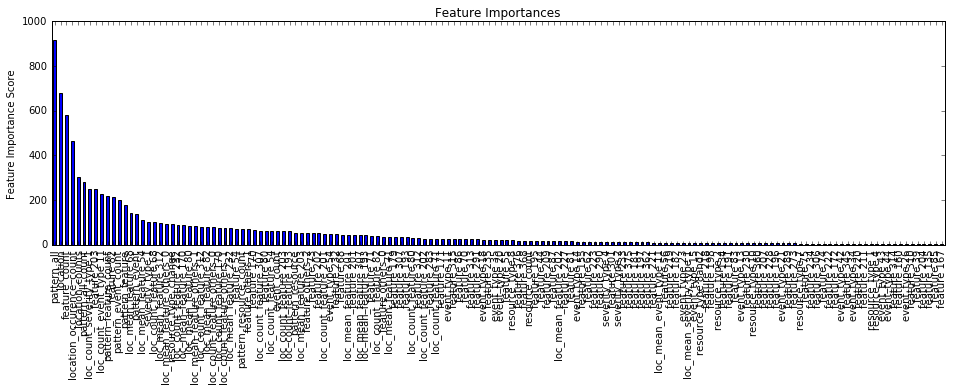


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4420   270   94
1.0              407  1387   77
2.0               50    38  638
Note: rows - actual; col - predicted
Train (Accuracy) : 87.319%
Train (log_loss) : 0.334207
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [16]:
xgb1.modelfit(useTrainCV=True , performCV=False)

In [17]:
xgb1.get_feature_importance()

pattern_all                   917
location                      677
feature_count                 580
location_occurence_count      466
location_counts               304
pattern_all_count             281
loc_count_severity_type 1     251
feature 203                   247
loc_count_event_type 11       226
pattern_feature_count         219
feature 82                    215
pattern_event_count           201
pattern_feature               176
loc_mean_feature 68           140
pattern_event                 137
loc_mean_feature 54           109
severity_type 1               101
loc_count_feature 68          101
loc_mean_feature 312           98
loc_mean_feature others_0      93
resource_type_change           92
loc_count_feature 232          89
loc_mean_feature 170           88
loc_mean_feature 80            83
loc_mean_feature others_1      81
loc_count_feature 312          80
loc_mean_feature 82            77
loc_count_feature others_0     77
loc_count_feature 170          74
loc_count_feat

### grid search on max_depth , min_child_weight

In [18]:
xgb2 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [19]:
xgb2.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":138 , 
    "max_depth":6 , 
    "min_child_weight":6 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.8 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8,
    "scale_pos_weight":1 , 
})
param_test1 ={
    "max_depth":range(3 , 8) , 
    "min_child_weight":range(0 , 7)
}

In [20]:
xgb2.GridSearch(param_test1 , n_jobs=8 , iid = False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    max_depth  min_child_weight    meanCV     stdCV
0           3                 0 -0.506523  0.008702
1           3                 1 -0.507102  0.008779
2           3                 2 -0.508143  0.008270
3           3                 3 -0.508264  0.008227
4           3                 4 -0.509980  0.008026
5           3                 5 -0.510642  0.006965
6           3                 6 -0.511494  0.007045
7           4                 0 -0.494221  0.009603
8           4                 1 -0.493830  0.008935
9           4                 2 -0.494139  0.008714
10          4                 3 -0.496071  0.008314
11          4                 4 -0.497306  0.008675
12          4                 5 -0.497409  0.007563
13          4                 6 -0.498060  0.007917
14          5                 0 -0.487595  0.009378
15          5                 1 -0.487422  0.009557
16          5                 2 -0.488875  0.009680
17          5                 3 -0.488510  

In [21]:
xgb3 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

[0]	train-mlogloss:1.0255+0.00156092	test-mlogloss:1.02946+0.00107059
[1]	train-mlogloss:0.962528+0.00202495	test-mlogloss:0.970706+0.00219757
[2]	train-mlogloss:0.908371+0.00211855	test-mlogloss:0.920195+0.002921
[3]	train-mlogloss:0.861198+0.00163722	test-mlogloss:0.877008+0.00409094
[4]	train-mlogloss:0.819468+0.0014947	test-mlogloss:0.838879+0.00485942
[5]	train-mlogloss:0.782651+0.00200515	test-mlogloss:0.805611+0.00541424
[6]	train-mlogloss:0.750058+0.00187255	test-mlogloss:0.776111+0.00607928
[7]	train-mlogloss:0.721283+0.0021882	test-mlogloss:0.750909+0.00633993
[8]	train-mlogloss:0.695628+0.00233734	test-mlogloss:0.727834+0.00681201
[9]	train-mlogloss:0.671829+0.00256406	test-mlogloss:0.707049+0.00661028
[10]	train-mlogloss:0.650377+0.00306253	test-mlogloss:0.68858+0.00675546
[11]	train-mlogloss:0.63082+0.00330865	test-mlogloss:0.672524+0.00659866
[12]	train-mlogloss:0.613354+0.00318015	test-mlogloss:0.657548+0.00682744
[13]	train-mlogloss:0.597946+0.00294354	test-mlogloss:0.6

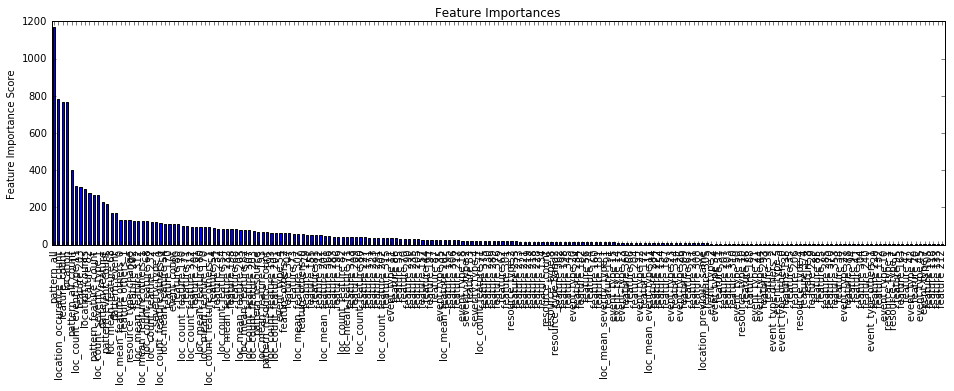


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4478   228   78
1.0              322  1499   50
2.0               34    27  665
Note: rows - actual; col - predicted
Train (Accuracy) : 89.988%
Train (log_loss) : 0.296596
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [22]:
xgb3.set_parameters({
    "learning_rate":0.1 ,
    "n_estimators":300 , 
    "max_depth":6 , 
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.8 , 
    "objective":"multi:softprob",
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":12 , 
    "scale_pos_weight":1
})
xgb3.modelfit(useTrainCV=True , performCV=False)

In [23]:
xgb4 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl="log_loss" , scoring_metric_xgb="mlogloss")

In [24]:
xgb4.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":140 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.8 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

param_test4 = {
    "gamma":[x/100.0 for x in range(0 , 21 , 5)]
}

In [25]:
xgb4.GridSearch(param_test4 , n_jobs=8 , iid=False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
   gamma    meanCV     stdCV
0   0.00 -0.487924  0.010772
1   0.05 -0.487397  0.009663
2   0.10 -0.486076  0.010315
3   0.15 -0.487419  0.010031
4   0.20 -0.486889  0.011088

Best Parameters:  {'gamma': 0.1}

Best Score:  -0.486075958895


In [26]:
xgb5 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl= "log_loss" , scoring_metric_xgb = "mlogloss")

In [27]:
xgb5.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":140 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0.1 , 
    "subsample":0.8 , 
    "colsample_bytree":0.8 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

param_test5 = {
    "subsample":[x / 10.0 for x in range(5 , 11)] ,
    "colsample_bytree":[x/10.0 for x in range(5 , 10)]
}

In [28]:
xgb5.GridSearch(param_test5 , n_jobs=8 , iid=False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    subsample  colsample_bytree    meanCV     stdCV
0         0.5               0.5 -0.492145  0.006629
1         0.6               0.5 -0.488029  0.008985
2         0.7               0.5 -0.487249  0.009509
3         0.8               0.5 -0.485622  0.011147
4         0.9               0.5 -0.486256  0.010752
5         1.0               0.5 -0.487358  0.009841
6         0.5               0.6 -0.493457  0.010617
7         0.6               0.6 -0.488189  0.008963
8         0.7               0.6 -0.486626  0.008703
9         0.8               0.6 -0.485268  0.010314
10        0.9               0.6 -0.487055  0.010213
11        1.0               0.6 -0.488178  0.011020
12        0.5               0.7 -0.491306  0.010529
13        0.6               0.7 -0.488438  0.007989
14        0.7               0.7 -0.486031  0.009938
15        0.8               0.7 -0.486855  0.010677
16        0.9               0.7 -0.487169  0.010993
17        1.0               0.7 -0.487763  

In [29]:
xgb5b = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl= "log_loss" , scoring_metric_xgb = "mlogloss")

In [30]:
xgb5b.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":140 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0.1 , 
    "subsample":0.8 , 
    "colsample_bytree":0.6 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

param_test6 = {
    "subsample":[0.75 , 0.8 , 0.85] ,
    "colsample_bytree":[0.55 , 0.6 , 0.65]
}

In [31]:
xgb5b.GridSearch(param_test6 , n_jobs=8 , iid=False , cv=5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
   subsample  colsample_bytree    meanCV     stdCV
0       0.75              0.55 -0.484616  0.009979
1       0.80              0.55 -0.483787  0.010177
2       0.85              0.55 -0.484996  0.010886
3       0.75              0.60 -0.486312  0.009669
4       0.80              0.60 -0.485268  0.010314
5       0.85              0.60 -0.485368  0.011086
6       0.75              0.65 -0.485430  0.008574
7       0.80              0.65 -0.487128  0.008805
8       0.85              0.65 -0.486277  0.010561

Best Parameters:  {'subsample': 0.8, 'colsample_bytree': 0.55}

Best Score:  -0.48378749516


In [32]:
xgb6 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl= "log_loss" , scoring_metric_xgb = "mlogloss")

[0]	train-mlogloss:1.02818+0.00206873	test-mlogloss:1.03206+0.00190382
[1]	train-mlogloss:0.966122+0.00246254	test-mlogloss:0.973749+0.00228368
[2]	train-mlogloss:0.912998+0.0032814	test-mlogloss:0.924418+0.00341397
[3]	train-mlogloss:0.866624+0.00250492	test-mlogloss:0.881747+0.00360109
[4]	train-mlogloss:0.826321+0.00246339	test-mlogloss:0.844802+0.00406598
[5]	train-mlogloss:0.790116+0.00361705	test-mlogloss:0.811867+0.00503103
[6]	train-mlogloss:0.757991+0.00341971	test-mlogloss:0.782798+0.00520782
[7]	train-mlogloss:0.72914+0.00358898	test-mlogloss:0.756887+0.00468203
[8]	train-mlogloss:0.702844+0.00359118	test-mlogloss:0.733883+0.00481917
[9]	train-mlogloss:0.679397+0.00379715	test-mlogloss:0.713138+0.00480293
[10]	train-mlogloss:0.658434+0.00416304	test-mlogloss:0.694827+0.00456706
[11]	train-mlogloss:0.639502+0.00424327	test-mlogloss:0.678541+0.00440413
[12]	train-mlogloss:0.622017+0.00395667	test-mlogloss:0.663511+0.00517536
[13]	train-mlogloss:0.605902+0.00365885	test-mloglos

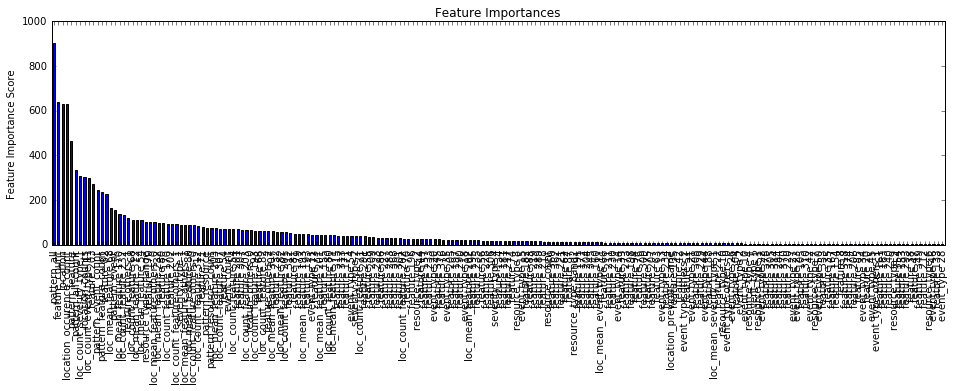


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4456   242   86
1.0              341  1476   54
2.0               39    33  654
Note: rows - actual; col - predicted
Train (Accuracy) : 89.229%
Train (log_loss) : 0.314787
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [33]:
xgb6.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0.1 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})
xgb6.modelfit(useTrainCV=True , performCV=False)

[0]	train-mlogloss:1.02818+0.00206392	test-mlogloss:1.03208+0.00190065
[1]	train-mlogloss:0.966116+0.00246306	test-mlogloss:0.973768+0.00228126
[2]	train-mlogloss:0.912989+0.00328775	test-mlogloss:0.924426+0.00339553
[3]	train-mlogloss:0.866601+0.0025205	test-mlogloss:0.88177+0.00358849
[4]	train-mlogloss:0.82632+0.00253274	test-mlogloss:0.844848+0.00401624
[5]	train-mlogloss:0.790122+0.00368116	test-mlogloss:0.811917+0.00498534
[6]	train-mlogloss:0.75801+0.00346166	test-mlogloss:0.782921+0.0052322
[7]	train-mlogloss:0.729162+0.00362013	test-mlogloss:0.757026+0.00466915
[8]	train-mlogloss:0.702933+0.00359613	test-mlogloss:0.733996+0.00476402
[9]	train-mlogloss:0.679476+0.00377458	test-mlogloss:0.713285+0.00472498
[10]	train-mlogloss:0.658413+0.00412389	test-mlogloss:0.695019+0.00441612
[11]	train-mlogloss:0.639535+0.00415456	test-mlogloss:0.678674+0.00425545
[12]	train-mlogloss:0.622049+0.0038709	test-mlogloss:0.663716+0.00496845
[13]	train-mlogloss:0.60603+0.00342786	test-mlogloss:0.6

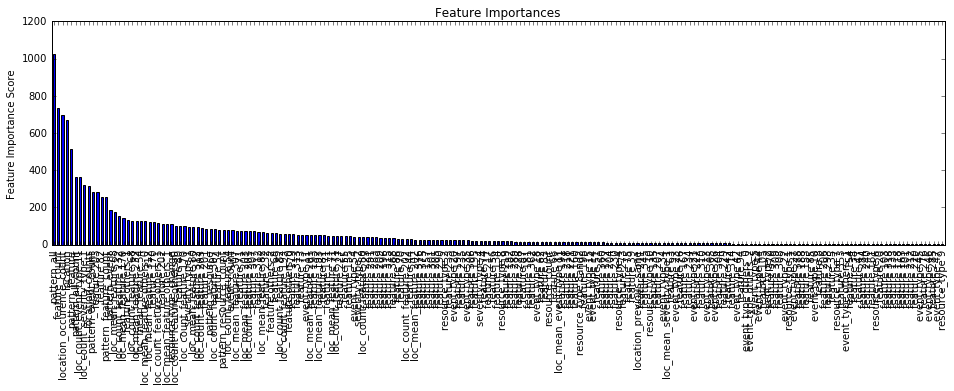


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4469   233   82
1.0              315  1505   51
2.0               31    27  668
Note: rows - actual; col - predicted
Train (Accuracy) : 89.988%
Train (log_loss) : 0.302261
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [34]:
xgb7 = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl= "log_loss" , scoring_metric_xgb = "mlogloss")

xgb7.set_parameters({
    "learning_rate":0.1 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})
xgb7.modelfit(useTrainCV=True , performCV=False)

In [35]:
xgb3.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb3_model2.csv")

In [36]:
xgb7.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb7_model2.csv")

In [37]:
from sklearn.cross_validation import StratifiedShuffleSplit

In [38]:
sss = StratifiedShuffleSplit(train["fault_severity"] , 10 , test_size=0.5)

In [39]:
for train_split , test_split in sss:
    split1 = train_split
    split2 = test_split
train_h1 = train.iloc[split1]
train_h2 = train.iloc[split2]

In [40]:
train_split

array([ 827,  724, 2608, ..., 2201, 2605,  557])

In [41]:
train_h1["fault_severity"].value_counts()

0.0    2392
1.0     935
2.0     363
Name: fault_severity, dtype: int64

In [42]:
train_h2["fault_severity"].value_counts()

0.0    2392
1.0     936
2.0     363
Name: fault_severity, dtype: int64

In [43]:
xgb8a = models_classification.XGBoost_Class(train_h1 , train_h2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [44]:
xgb8a.set_parameters({
    "learning_rate":0.05 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.06142+0.00053139	test-mlogloss:1.06453+0.000325462
[1]	train-mlogloss:1.02693+0.000705586	test-mlogloss:1.03335+0.000849095
[2]	train-mlogloss:0.994463+0.000428691	test-mlogloss:1.004+0.00110509
[3]	train-mlogloss:0.964215+0.000523712	test-mlogloss:0.977122+0.0014618
[4]	train-mlogloss:0.936123+0.000862897	test-mlogloss:0.951732+0.00194084
[5]	train-mlogloss:0.909973+0.00114715	test-mlogloss:0.928463+0.00231056
[6]	train-mlogloss:0.885088+0.000885622	test-mlogloss:0.906715+0.00261747
[7]	train-mlogloss:0.861827+0.000859404	test-mlogloss:0.886489+0.00301203
[8]	train-mlogloss:0.840507+0.000569031	test-mlogloss:0.867565+0.0033186
[9]	train-mlogloss:0.820475+0.000425505	test-mlogloss:0.849779+0.00320845
[10]	train-mlogloss:0.800898+0.00075105	test-mlogloss:0.833081+0.00307972
[11]	train-mlogloss:0.783138+0.000821032	test-mlogloss:0.817367+0.00344975
[12]	train-mlogloss:0.766444+0.00103143	test-mlogloss:0.803246+0.00287327
[13]	train-mlogloss:0.750412+0.000819169	test-

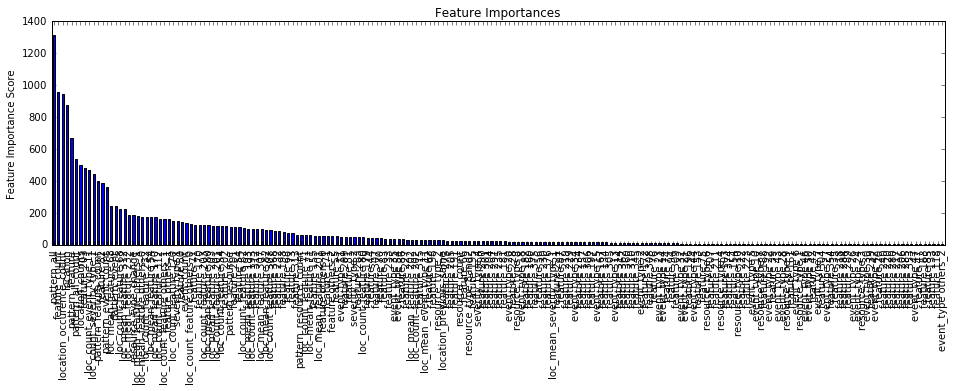


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2282   79   31
1.0              155  768   12
2.0               11    7  345
Note: rows - actual; col - predicted
Train (Accuracy) : 92.005%
Train (log_loss) : 0.280913
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [45]:
xgb8a.modelfit(useTrainCV=True , performCV=False)

In [46]:
xgb8b = models_classification.XGBoost_Class(train_h2 , train_h1 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [47]:
xgb8b.set_parameters({
    "learning_rate":0.05 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.06057+0.000886205	test-mlogloss:1.0641+0.000722522
[1]	train-mlogloss:1.02565+0.000874983	test-mlogloss:1.03261+0.00176558
[2]	train-mlogloss:0.992724+0.00115201	test-mlogloss:1.00339+0.00187908
[3]	train-mlogloss:0.962434+0.00124187	test-mlogloss:0.97637+0.00286242
[4]	train-mlogloss:0.933862+0.00129066	test-mlogloss:0.951214+0.00390145
[5]	train-mlogloss:0.907945+0.00182703	test-mlogloss:0.928405+0.00458747
[6]	train-mlogloss:0.883657+0.00237435	test-mlogloss:0.907315+0.00509753
[7]	train-mlogloss:0.861303+0.00231135	test-mlogloss:0.887953+0.0059922
[8]	train-mlogloss:0.839284+0.00204814	test-mlogloss:0.868979+0.00607533
[9]	train-mlogloss:0.818927+0.00228583	test-mlogloss:0.851599+0.00674879
[10]	train-mlogloss:0.799551+0.00195878	test-mlogloss:0.835012+0.00757747
[11]	train-mlogloss:0.781049+0.00219908	test-mlogloss:0.819347+0.0079364
[12]	train-mlogloss:0.763649+0.00242099	test-mlogloss:0.804333+0.00853771
[13]	train-mlogloss:0.747206+0.00231411	test-mlogloss:

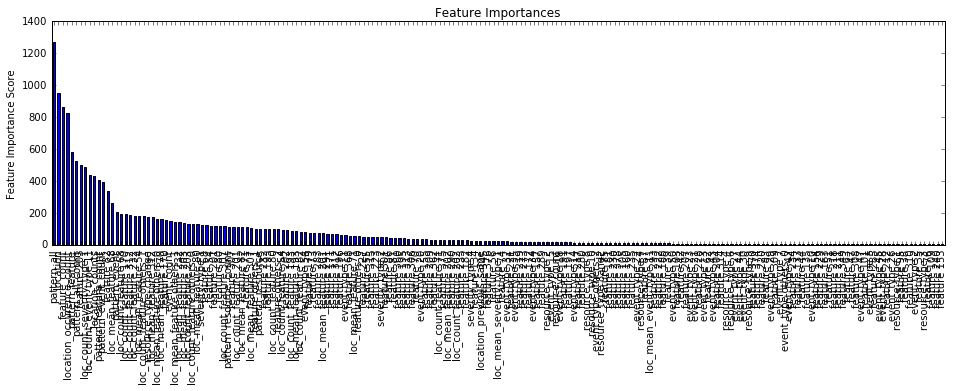


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2275   93   24
1.0              148  769   19
2.0               16   12  335
Note: rows - actual; col - predicted
Train (Accuracy) : 91.547%
Train (log_loss) : 0.287342
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [48]:
xgb8b.modelfit(useTrainCV=True , performCV=False)

In [49]:
train_h2["stack_pred_0"] = 0
train_h2["stack_pred_1"] = 0
train_h2["stack_pred_2"] = 0
train_h2[["stack_pred_0" , "stack_pred_1" , "stack_pred_2"]] = xgb8a.get_test_predictions(getprob=True)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [50]:
train_h1["stack_pred_0"] = 0
train_h1["stack_pred_1"] = 0
train_h1["stack_pred_2"] = 0
train_h1[["stack_pred_0" , "stack_pred_1" , "stack_pred_2"]] = xgb8b.get_test_predictions(getprob=True)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [51]:
train_h2[["stack_pred_0" , "stack_pred_1" , "stack_pred_2"]].head()

stack_pred_0  stack_pred_1  stack_pred_2
5391      0.264515      0.692506      0.042978
3223      0.967128      0.026763      0.006109
716       0.082182      0.894883      0.022934
2254      0.915399      0.081372      0.003229
1022      0.829666      0.152429      0.017905

In [52]:
train2 = pd.concat([train_h1 , train_h2] , ignore_index=True)

In [53]:
xgb8c = models_classification.XGBoost_Class(train , test , target , predictors , cv_folds=5 ,
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [54]:
xgb8c.set_parameters({
    "learning_rate":0.05 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.06273+0.00105717	test-mlogloss:1.06469+0.000980601
[1]	train-mlogloss:1.02855+0.00139661	test-mlogloss:1.03245+0.00142771
[2]	train-mlogloss:0.997315+0.00191339	test-mlogloss:1.0031+0.0020454
[3]	train-mlogloss:0.968066+0.00151112	test-mlogloss:0.975765+0.00218169
[4]	train-mlogloss:0.941004+0.0015821	test-mlogloss:0.950565+0.00240125
[5]	train-mlogloss:0.915707+0.00223955	test-mlogloss:0.926996+0.0029264
[6]	train-mlogloss:0.892263+0.00231155	test-mlogloss:0.905149+0.0034387
[7]	train-mlogloss:0.869841+0.00186301	test-mlogloss:0.884819+0.00340993
[8]	train-mlogloss:0.848753+0.00189708	test-mlogloss:0.86556+0.00337071
[9]	train-mlogloss:0.828958+0.00213078	test-mlogloss:0.847243+0.00342974
[10]	train-mlogloss:0.810391+0.00247266	test-mlogloss:0.830404+0.00348602
[11]	train-mlogloss:0.792655+0.00301236	test-mlogloss:0.814309+0.00287832
[12]	train-mlogloss:0.776036+0.00290436	test-mlogloss:0.799257+0.00328482
[13]	train-mlogloss:0.760253+0.00275999	test-mlogloss:0.78

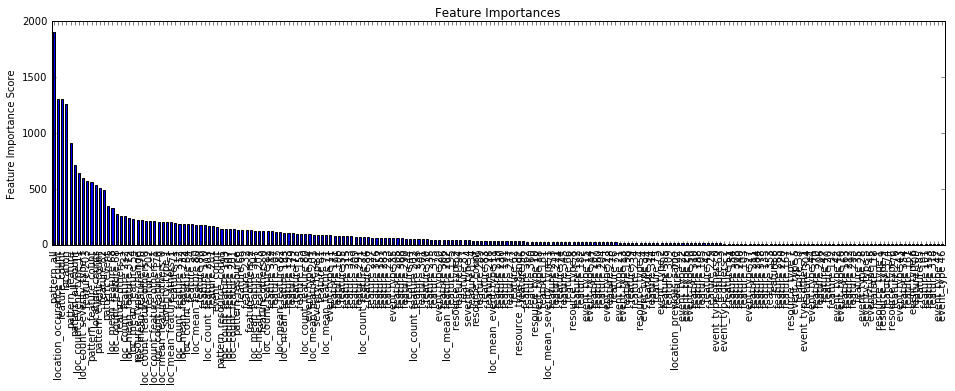


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4454   238   92
1.0              337  1477   57
2.0               39    30  657
Note: rows - actual; col - predicted
Train (Accuracy) : 89.256%
Train (log_loss) : 0.312050
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [55]:
xgb8c.modelfit(useTrainCV=True , performCV=False)

In [56]:
test2 = pd.DataFrame(test , copy=True)

In [57]:
test2["stack_pred_0"] = 0
test2["stack_pred_1"] = 0 
test2["stack_pred_2"] = 0
test2[["stack_pred_0" , "stack_pred_1" , "stack_pred_2"]] = xgb8c.get_test_predictions(getprob=True)

In [58]:
target in predictors

False

In [59]:
xgb9 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                          scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [60]:
xgb9.set_parameters({
    "learning_rate":0.05 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.06249+0.00148987	test-mlogloss:1.06448+0.00129658
[1]	train-mlogloss:1.0279+0.00161012	test-mlogloss:1.03194+0.00128763
[2]	train-mlogloss:0.996364+0.00163074	test-mlogloss:1.00249+0.00115019
[3]	train-mlogloss:0.967432+0.00164915	test-mlogloss:0.975556+0.000914241
[4]	train-mlogloss:0.940215+0.00150952	test-mlogloss:0.950247+0.000989849
[5]	train-mlogloss:0.914831+0.00205908	test-mlogloss:0.926821+0.00111606
[6]	train-mlogloss:0.891352+0.00247068	test-mlogloss:0.905218+0.00137148
[7]	train-mlogloss:0.86912+0.00230512	test-mlogloss:0.88464+0.00130274
[8]	train-mlogloss:0.848039+0.00203549	test-mlogloss:0.865229+0.00162075
[9]	train-mlogloss:0.828165+0.0020933	test-mlogloss:0.847099+0.00214775
[10]	train-mlogloss:0.809655+0.00230112	test-mlogloss:0.830161+0.0023933
[11]	train-mlogloss:0.792184+0.0018328	test-mlogloss:0.814341+0.00252502
[12]	train-mlogloss:0.775578+0.00207101	test-mlogloss:0.799312+0.00252197
[13]	train-mlogloss:0.759673+0.00204729	test-mlogloss:0.7

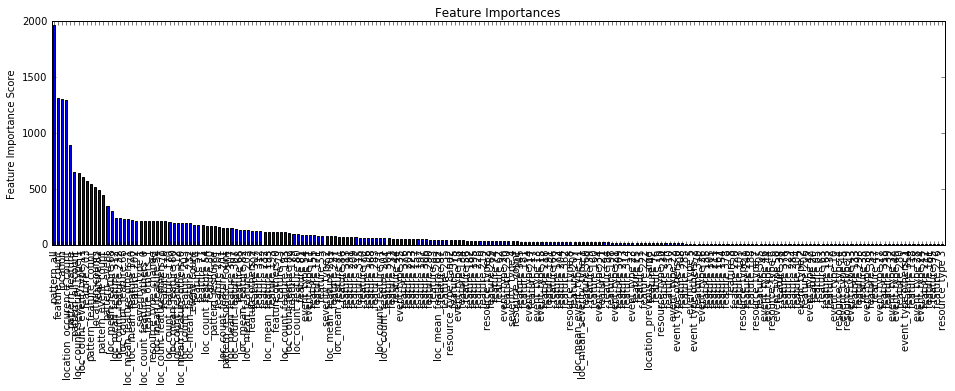


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4456   238   90
1.0              339  1478   54
2.0               41    27  658
Note: rows - actual; col - predicted
Train (Accuracy) : 89.310%
Train (log_loss) : 0.313100
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [61]:
xgb9.modelfit(useTrainCV=True , performCV=False)

In [62]:
stack_col = ["stack_pred_0" , "stack_pred_1" , "stack_pred_2"]

In [63]:
train3 = pd.DataFrame(train2 , copy=True)
test3 = pd.DataFrame(test2 , copy=True)

In [64]:
train3["stack_pred"] = train3[stack_col].apply(lambda x: np.argmax(x.values) , axis = 1)

In [65]:
test3["stack_pred"] = test3[stack_col].apply(lambda x: np.argmax(x.values) , axis = 1)

In [66]:
train3[stack_col + ["stack_pred"]].head()

stack_pred_0  stack_pred_1  stack_pred_2  stack_pred
0      0.424566      0.572456      0.002978           1
1      0.264930      0.716300      0.018771           1
2      0.997189      0.002401      0.000410           0
3      0.947878      0.049919      0.002204           0
4      0.928851      0.065116      0.006033           0

In [67]:
train3.drop(stack_col , axis = 1 , inplace = True)
test3.drop(stack_col , axis = 1 , inplace = True)

In [68]:
xgb10 = models_classification.XGBoost_Class(train3 , test3 , target , predictors , cv_folds=5 ,
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [69]:
xgb10.set_parameters({
    "learning_rate":0.05 , 
    "n_estimators":1000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.06249+0.00148987	test-mlogloss:1.06448+0.00129658
[1]	train-mlogloss:1.0279+0.00161012	test-mlogloss:1.03194+0.00128763
[2]	train-mlogloss:0.996364+0.00163074	test-mlogloss:1.00249+0.00115019
[3]	train-mlogloss:0.967432+0.00164915	test-mlogloss:0.975556+0.000914241
[4]	train-mlogloss:0.940215+0.00150952	test-mlogloss:0.950247+0.000989849
[5]	train-mlogloss:0.914831+0.00205908	test-mlogloss:0.926821+0.00111606
[6]	train-mlogloss:0.891352+0.00247068	test-mlogloss:0.905218+0.00137148
[7]	train-mlogloss:0.86912+0.00230512	test-mlogloss:0.88464+0.00130274
[8]	train-mlogloss:0.848039+0.00203549	test-mlogloss:0.865229+0.00162075
[9]	train-mlogloss:0.828165+0.0020933	test-mlogloss:0.847099+0.00214775
[10]	train-mlogloss:0.809655+0.00230112	test-mlogloss:0.830161+0.0023933
[11]	train-mlogloss:0.792184+0.0018328	test-mlogloss:0.814341+0.00252502
[12]	train-mlogloss:0.775578+0.00207101	test-mlogloss:0.799312+0.00252197
[13]	train-mlogloss:0.759673+0.00204729	test-mlogloss:0.7

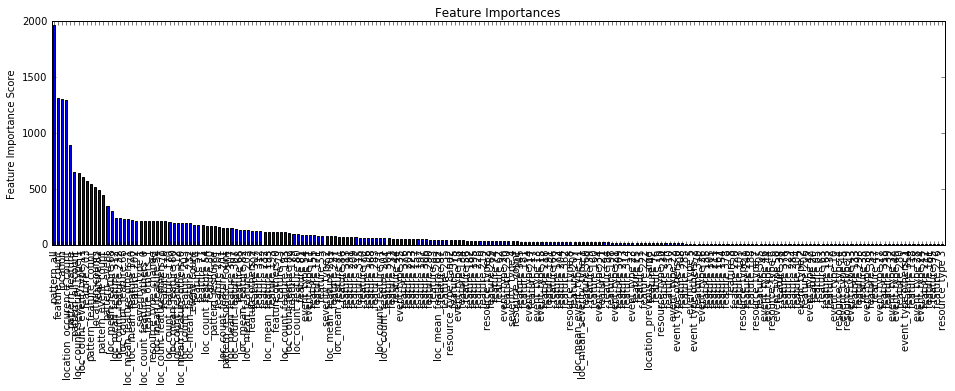


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4456   238   90
1.0              339  1478   54
2.0               41    27  658
Note: rows - actual; col - predicted
Train (Accuracy) : 89.310%
Train (log_loss) : 0.313100
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [70]:
xgb10.modelfit(useTrainCV=True , performCV=False)

In [71]:
xgb10b = models_classification.XGBoost_Class(train3 , test3 , target , predictors , cv_folds=5 ,
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [72]:
xgb10b.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

[0]	train-mlogloss:1.09128+0.000303657	test-mlogloss:1.09168+0.000265228
[1]	train-mlogloss:1.08383+0.000344277	test-mlogloss:1.08466+0.000273514
[2]	train-mlogloss:1.07663+0.00036994	test-mlogloss:1.07787+0.000274057
[3]	train-mlogloss:1.06957+0.000405073	test-mlogloss:1.07126+0.000237229
[4]	train-mlogloss:1.06255+0.000390963	test-mlogloss:1.06464+0.000184733
[5]	train-mlogloss:1.05567+0.000547205	test-mlogloss:1.05818+0.000268086
[6]	train-mlogloss:1.04897+0.000669511	test-mlogloss:1.05189+0.000444658
[7]	train-mlogloss:1.04235+0.000589143	test-mlogloss:1.04565+0.000424137
[8]	train-mlogloss:1.03581+0.000617064	test-mlogloss:1.03949+0.000541255
[9]	train-mlogloss:1.02938+0.000607109	test-mlogloss:1.03343+0.000665795
[10]	train-mlogloss:1.02304+0.000657135	test-mlogloss:1.02742+0.00073471
[11]	train-mlogloss:1.01674+0.000539402	test-mlogloss:1.0215+0.000781501
[12]	train-mlogloss:1.01059+0.000604461	test-mlogloss:1.01578+0.0008835
[13]	train-mlogloss:1.0044+0.000636939	test-mlogloss:

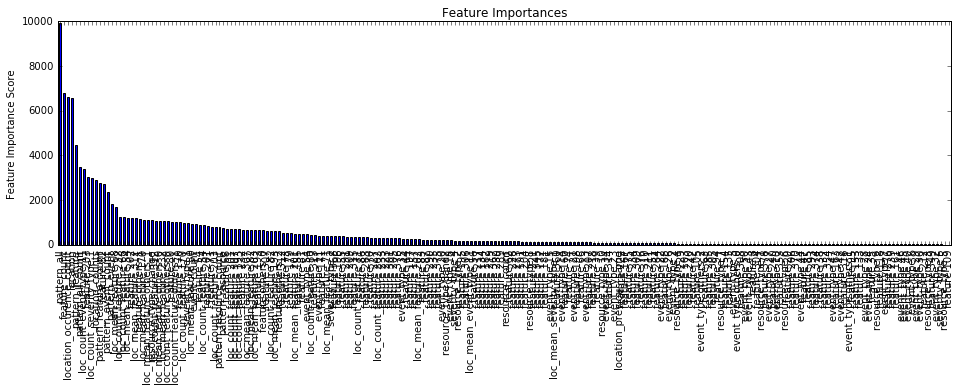


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4467   231   86
1.0              330  1485   56
2.0               34    33  659
Note: rows - actual; col - predicted
Train (Accuracy) : 89.568%
Train (log_loss) : 0.307587
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [73]:
xgb10b.modelfit(useTrainCV=True , performCV=False)

In [74]:
xgb7.export_model([IDcol])

In [75]:
xgb3.export_model([IDcol])

In [76]:
xgb10.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb10b_model2.csv")

In [77]:
xgb10.export_model([IDcol])

In [78]:
xgb11 = models_classification.XGBoost_Class(train2 , test2 , target ,predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

[0]	train-mlogloss:1.09128+0.000303657	test-mlogloss:1.09168+0.000265228
[1]	train-mlogloss:1.08383+0.000344277	test-mlogloss:1.08466+0.000273514
[2]	train-mlogloss:1.07663+0.00036994	test-mlogloss:1.07787+0.000274057
[3]	train-mlogloss:1.06957+0.000405073	test-mlogloss:1.07126+0.000237229
[4]	train-mlogloss:1.06255+0.000390963	test-mlogloss:1.06464+0.000184733
[5]	train-mlogloss:1.05567+0.000547205	test-mlogloss:1.05818+0.000268086
[6]	train-mlogloss:1.04897+0.000669511	test-mlogloss:1.05189+0.000444658
[7]	train-mlogloss:1.04235+0.000589143	test-mlogloss:1.04565+0.000424137
[8]	train-mlogloss:1.03581+0.000617064	test-mlogloss:1.03949+0.000541255
[9]	train-mlogloss:1.02938+0.000607109	test-mlogloss:1.03343+0.000665795
[10]	train-mlogloss:1.02304+0.000657135	test-mlogloss:1.02742+0.00073471
[11]	train-mlogloss:1.01674+0.000539402	test-mlogloss:1.0215+0.000781501
[12]	train-mlogloss:1.01059+0.000604461	test-mlogloss:1.01578+0.0008835
[13]	train-mlogloss:1.0044+0.000636939	test-mlogloss:

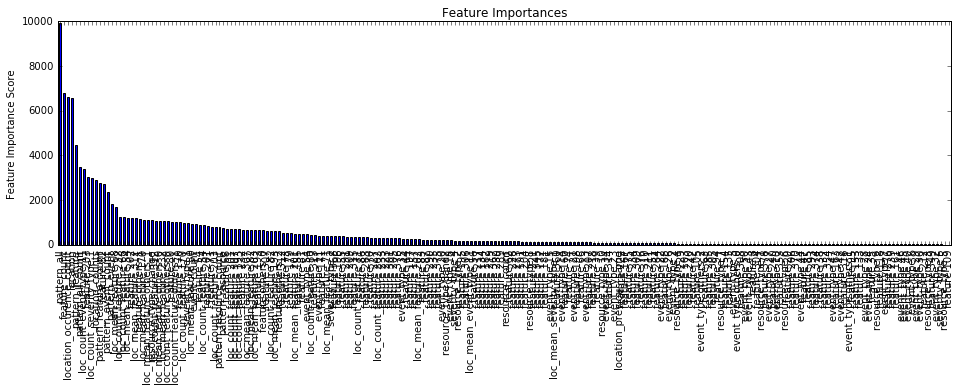


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4467   231   86
1.0              330  1485   56
2.0               34    33  659
Note: rows - actual; col - predicted
Train (Accuracy) : 89.568%
Train (log_loss) : 0.307587
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [79]:
xgb11.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":27
})

xgb11.modelfit(useTrainCV=True , performCV=False)

In [80]:
xgb11.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb11_model2.csv")

{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 55, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


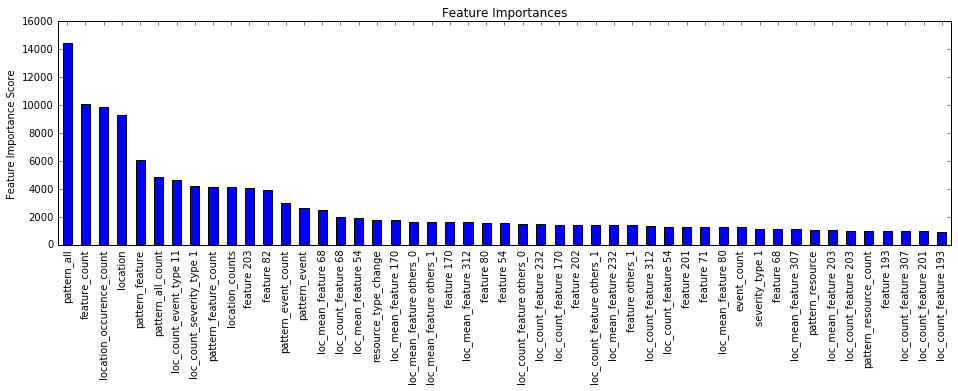


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4559   177   48
1.0              247  1590   34
2.0               23    17  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.603%
Train (log_loss) : 0.258125
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 1055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


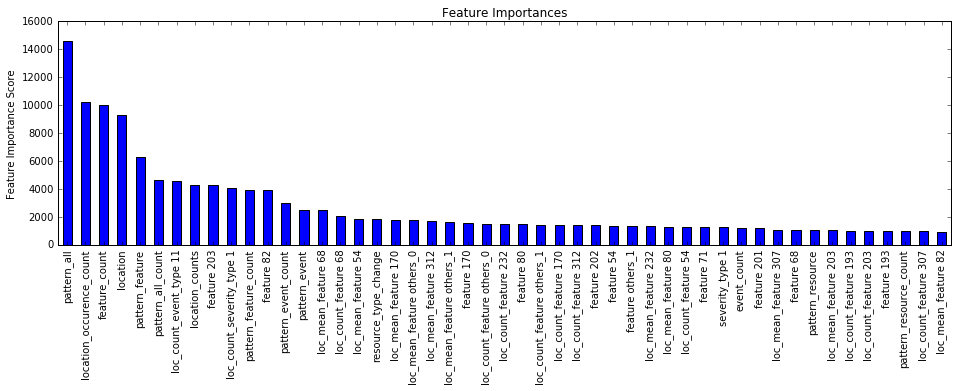


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4566   170   48
1.0              243  1592   36
2.0               21    18  687
Note: rows - actual; col - predicted
Train (Accuracy) : 92.738%
Train (log_loss) : 0.257684
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 2055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


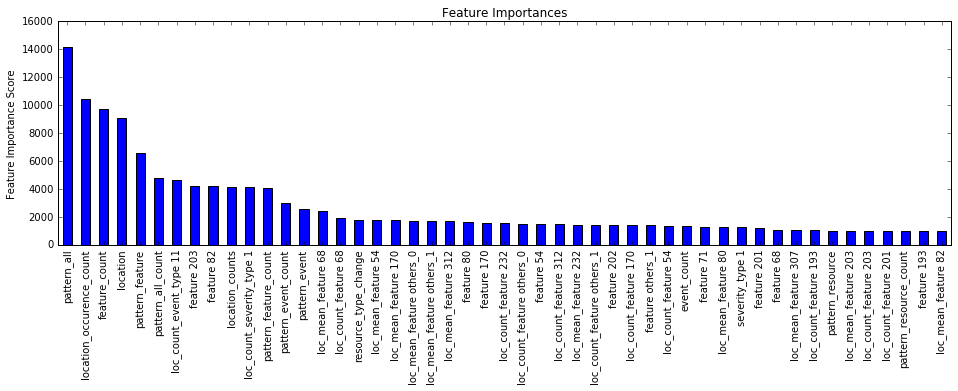


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4562   173   49
1.0              243  1594   34
2.0               18    18  690
Note: rows - actual; col - predicted
Train (Accuracy) : 92.752%
Train (log_loss) : 0.257628
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 3055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


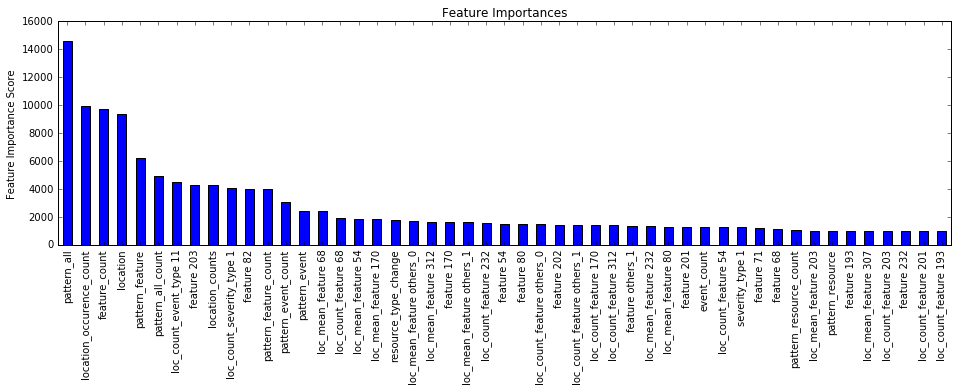


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4566   173   45
1.0              244  1590   37
2.0               20    18  688
Note: rows - actual; col - predicted
Train (Accuracy) : 92.725%
Train (log_loss) : 0.257551
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 4055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


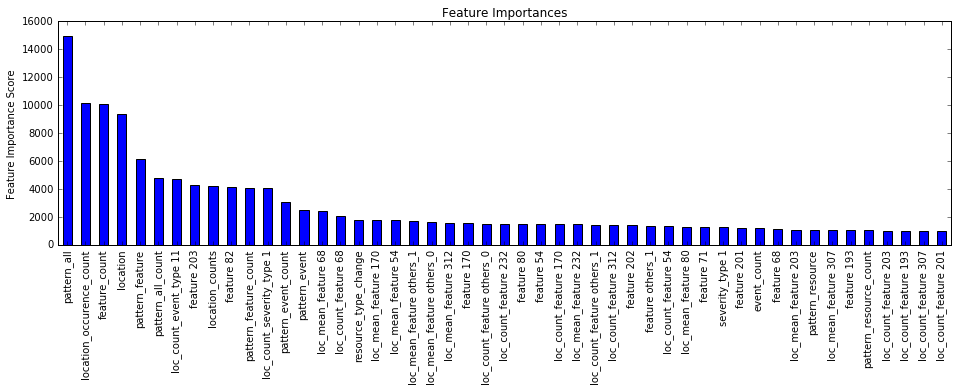


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4572   165   47
1.0              239  1597   35
2.0               20    20  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.874%
Train (log_loss) : 0.256650
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 5055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


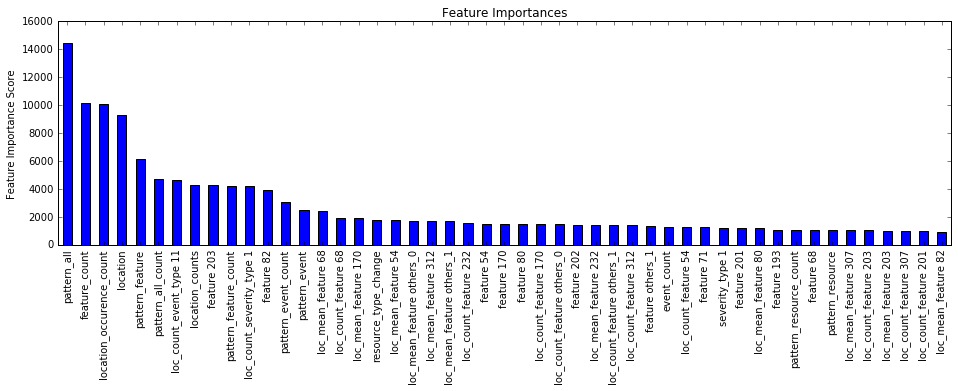


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4565   169   50
1.0              238  1598   35
2.0               20    20  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.792%
Train (log_loss) : 0.257741
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 6055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


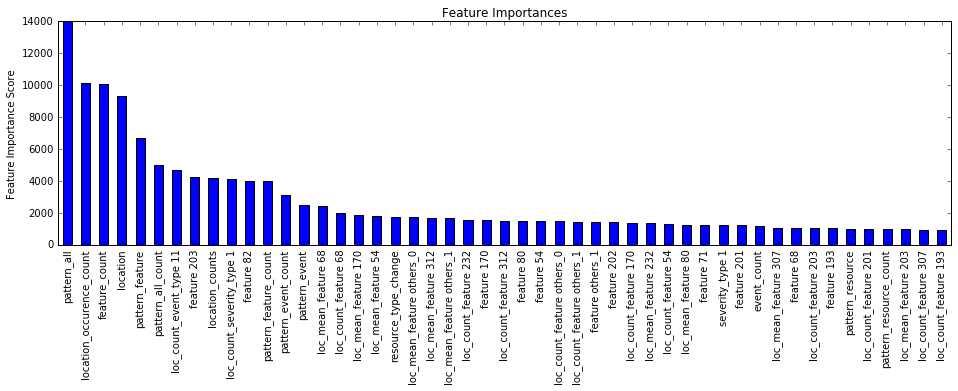


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4564   171   49
1.0              245  1590   36
2.0               22    19  685
Note: rows - actual; col - predicted
Train (Accuracy) : 92.657%
Train (log_loss) : 0.257045
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 7055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


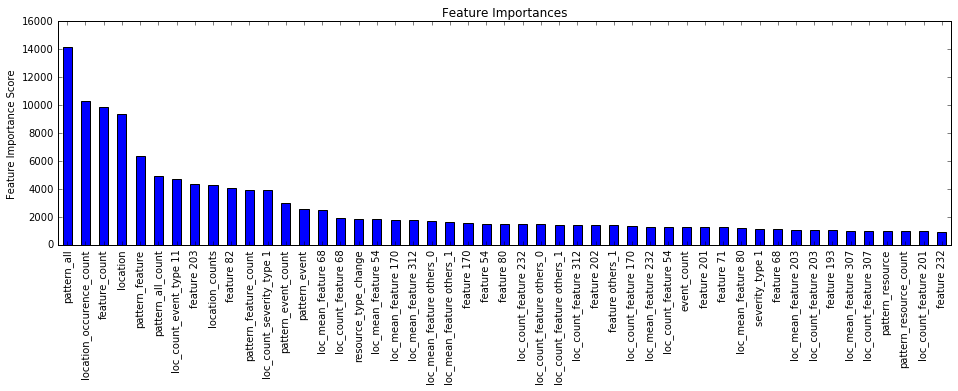


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4568   166   50
1.0              245  1591   35
2.0               22    18  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.738%
Train (log_loss) : 0.257764
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 8055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


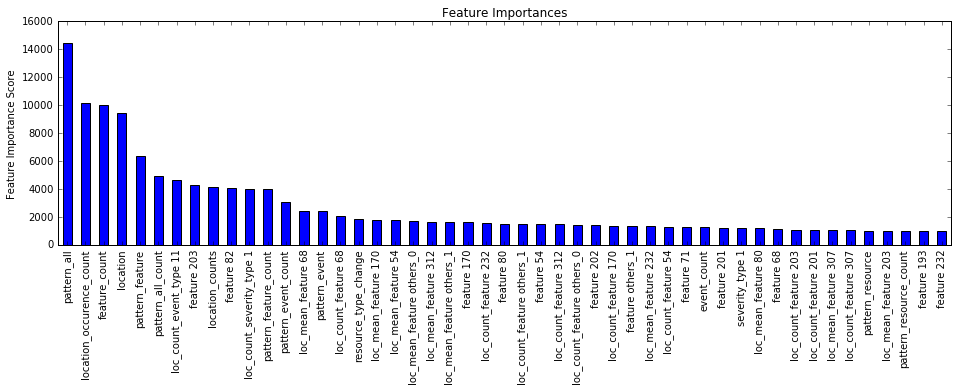


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4562   171   51
1.0              244  1594   33
2.0               20    20  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.697%
Train (log_loss) : 0.257692
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 8, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 9055, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


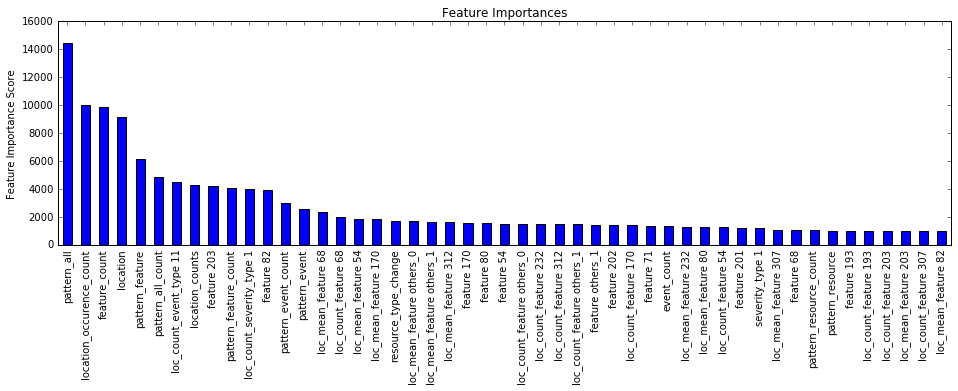


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4564   173   47
1.0              255  1580   36
2.0               22    18  686
Note: rows - actual; col - predicted
Train (Accuracy) : 92.535%
Train (log_loss) : 0.258727
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [81]:
for s in range(55 , 10000 , 1000):
    xgb12 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb12.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
    "seed":s
})
    xgb12.modelfit(useTrainCV = False , performCV = False , show_progress = False , printTopN = 50)
    fn = "submission/xgb12_model2_seed%d.csv"% s
    xgb12.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)
    

In [82]:
def combine_models_multi(files , newfile):
    f1 = pd.read_csv(files[0])
    f = pd.DataFrame(f1 , copy = True)
    nf = len(files)
    
    for i in range(1 , nf):
        f1 = pd.read_csv(files[i])
        f["predict_0"] += f1["predict_0"]
        f["predict_1"] += f1["predict_1"]
        f["predict_2"] += f1["predict_2"]
    f["predict_0"] /= nf
    f["predict_1"] /= nf
    f["predict_2"] /= nf
    print round(sum(f[["predict_0" , "predict_1" , "predict_2"]].sum()) , 0) == f.shape[0]
    f.to_csv(newfile , index = False)

In [83]:
model_comb = ["submission/xgb12_model2_seed%d.csv"% s for s in range(55 , 10000 , 1000)]

In [84]:
model_comb

['submission/xgb12_model2_seed55.csv',
 'submission/xgb12_model2_seed1055.csv',
 'submission/xgb12_model2_seed2055.csv',
 'submission/xgb12_model2_seed3055.csv',
 'submission/xgb12_model2_seed4055.csv',
 'submission/xgb12_model2_seed5055.csv',
 'submission/xgb12_model2_seed6055.csv',
 'submission/xgb12_model2_seed7055.csv',
 'submission/xgb12_model2_seed8055.csv',
 'submission/xgb12_model2_seed9055.csv']

In [85]:
combine_models_multi(model_comb , "submission/xgb12_model2_seedcombo.csv")

True


In [86]:
model_comb

['submission/xgb12_model2_seed55.csv',
 'submission/xgb12_model2_seed1055.csv',
 'submission/xgb12_model2_seed2055.csv',
 'submission/xgb12_model2_seed3055.csv',
 'submission/xgb12_model2_seed4055.csv',
 'submission/xgb12_model2_seed5055.csv',
 'submission/xgb12_model2_seed6055.csv',
 'submission/xgb12_model2_seed7055.csv',
 'submission/xgb12_model2_seed8055.csv',
 'submission/xgb12_model2_seed9055.csv']

## Create Ensemble
### 1. Random Forest

In [87]:
predictors = [x for x in train.columns if x not in [target , "location2" , "IDcol"]]
predictors = [x for x in predictors if not x.startswith("occurence")]

In [88]:
rf1 = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                               scoring_metric = "log_loss")

In [89]:
rf1.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**6 , 
    "min_samples_split":30 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample"
})

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 64, 'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


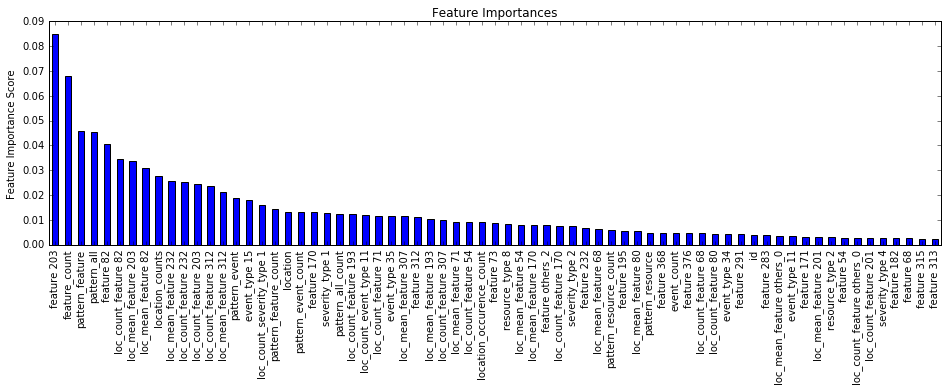

OOB Score : 0.720634


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             3504   831  449
1.0              257  1342  272
2.0                8    50  668
Note: rows - actual; col - predicted
Train (Accuracy) : 74.705%
Train (log_loss) : 0.631477
AUC : nan%
CV Score (Specified Metric) : Mean - -0.662780 | Std - 0.015701


In [90]:
rf1.modelfit(performCV=True , printTopN=70)

In [91]:
rf2 = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                               scoring_metric = "log_loss")

In [92]:
rf2.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**6 , 
    "min_samples_split":30 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
    "random_state":78
})

param_test1 = {
    "max_leaf_nodes":[2**x for x in range(4 , 9)] , 
    "min_samples_split":range(10 , 100 , 20)
}

In [93]:
rf2.GridSearch(param_test1 , n_jobs=-1 , iid=False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    min_samples_split  max_leaf_nodes    meanCV     stdCV
0                  10              16 -0.751652  0.015675
1                  30              16 -0.751524  0.015731
2                  50              16 -0.751667  0.015744
3                  70              16 -0.751243  0.015560
4                  90              16 -0.751063  0.015410
5                  10              32 -0.704656  0.015466
6                  30              32 -0.704372  0.015005
7                  50              32 -0.704962  0.015442
8                  70              32 -0.704400  0.015702
9                  90              32 -0.704536  0.015362
10                 10              64 -0.664011  0.015708
11                 30              64 -0.663561  0.015083
12                 50              64 -0.664407  0.015486
13                 70              64 -0.666171  0.015604
14                 90              64 -0.669090  0.015567
15                 10             128 -0.633028  0.

In [94]:
rf3 = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                               scoring_metric = "log_loss")

In [95]:
rf3.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**6 , 
    "min_samples_split":30 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
    "random_state":78
})

param_test2 = {
    "max_leaf_nodes":[2**x for x in range(9 , 12)] , 
    "min_samples_split":range(5 , 10)
}

In [96]:
rf3.GridSearch(param_test2 , n_jobs=-1 , iid=False , cv=5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    min_samples_split  max_leaf_nodes   meanCV     stdCV
0                   5             512 -0.62394  0.015726
1                   6             512 -0.62394  0.015726
2                   7             512 -0.62394  0.015726
3                   8             512 -0.62394  0.015726
4                   9             512 -0.62394  0.015726
5                   5            1024 -0.62394  0.015726
6                   6            1024 -0.62394  0.015726
7                   7            1024 -0.62394  0.015726
8                   8            1024 -0.62394  0.015726
9                   9            1024 -0.62394  0.015726
10                  5            2048 -0.62394  0.015726
11                  6            2048 -0.62394  0.015726
12                  7            2048 -0.62394  0.015726
13                  8            2048 -0.62394  0.015726
14                  9            2048 -0.62394  0.015726

Best Parameters:  {'min_samples_split': 5, 'max_leaf_nodes': 512}


In [97]:
rf4 = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                               scoring_metric = "log_loss")
rf4.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**6 , 
    "min_samples_split":30 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
    "random_state":78
})

param_test3 = {
    "max_leaf_nodes":[2**x for x in range(7 , 11)] , 
    "min_samples_split":range(2 , 6)
}
rf4.GridSearch(param_test3 , n_jobs=-1 , iid = False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    min_samples_split  max_leaf_nodes    meanCV     stdCV
0                   2             128 -0.633028  0.015663
1                   3             128 -0.633028  0.015663
2                   4             128 -0.633028  0.015663
3                   5             128 -0.633028  0.015663
4                   2             256 -0.623940  0.015726
5                   3             256 -0.623940  0.015726
6                   4             256 -0.623940  0.015726
7                   5             256 -0.623940  0.015726
8                   2             512 -0.623940  0.015726
9                   3             512 -0.623940  0.015726
10                  4             512 -0.623940  0.015726
11                  5             512 -0.623940  0.015726
12                  2            1024 -0.623940  0.015726
13                  3            1024 -0.623940  0.015726
14                  4            1024 -0.623940  0.015726
15                  5            1024 -0.623940  0.

In [98]:
rf5 = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                               scoring_metric="log_loss")

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 256, 'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


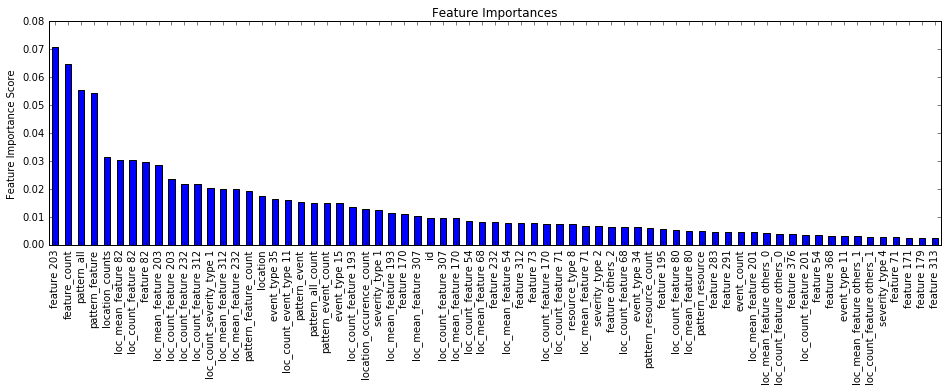

OOB Score : 0.739060


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             3645   771  368
1.0              215  1447  209
2.0                7    36  683
Note: rows - actual; col - predicted
Train (Accuracy) : 78.241%
Train (log_loss) : 0.544094
AUC : nan%
CV Score (Specified Metric) : Mean - -0.623940 | Std - 0.015726


In [99]:
rf5.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**8 , 
    "min_samples_split":2 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
    "random_state":78
})
rf5.modelfit(performCV=True , printTopN=70)

### 2. Extra Trees Classifier

In [100]:
ect1 = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                             scoring_metric = "log_loss")

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 1024, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


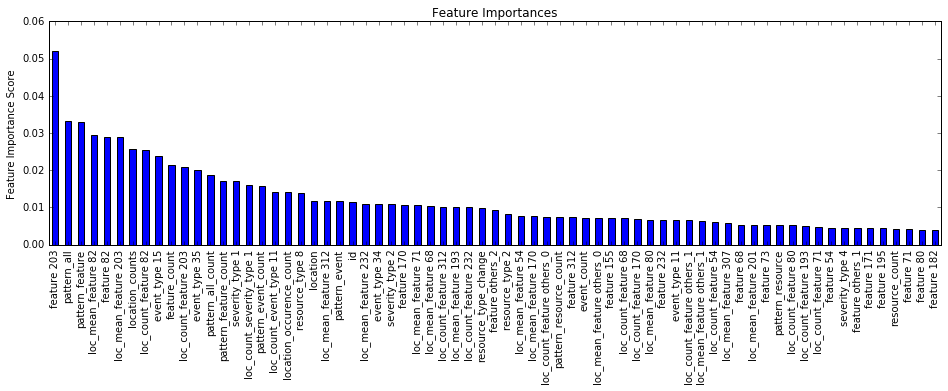

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4225   352  207
1.0              132  1639  100
2.0                0     0  726
Note: rows - actual; col - predicted
Train (Accuracy) : 89.283%
Train (log_loss) : 0.349007
AUC : nan%
CV Score (Specified Metric) : Mean - -0.558626 | Std - 0.016111


In [101]:
ect1.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**10 , 
    "min_samples_split":5 ,
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample"
})

ect1.modelfit(performCV=True , printTopN = 70)

In [102]:
etc2 = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                             scoring_metric = "log_loss")

In [103]:
etc2.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**6 , 
    "min_samples_split":30 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
param_test3 = {
    "max_leaf_nodes":[2**x for x in range(8 , 12)] , 
    "min_samples_split":[2 , 5 , 10 , 15]
}

In [104]:
etc2.GridSearch(param_test3 , n_jobs=-1 , iid=False , cv=5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    min_samples_split  max_leaf_nodes    meanCV     stdCV
0                   2             256 -0.646452  0.019005
1                   5             256 -0.642058  0.018977
2                  10             256 -0.639745  0.018877
3                  15             256 -0.637564  0.018982
4                   2             512 -0.603925  0.017061
5                   5             512 -0.599491  0.017231
6                  10             512 -0.597217  0.017475
7                  15             512 -0.596587  0.018125
8                   2            1024 -0.561383  0.015877
9                   5            1024 -0.558851  0.016173
10                 10            1024 -0.563069  0.017398
11                 15            1024 -0.577039  0.019194
12                  2            2048 -0.531016  0.016115
13                  5            2048 -0.540905  0.020885
14                 10            2048 -0.565032  0.022002
15                 15            2048 -0.577039  0.

In [105]:
etc2b = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                             scoring_metric = "log_loss")
etc2b.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
param_test4 = {
    "max_leaf_nodes":[2**x for x in range(10 , 15)] , 
}

etc2b.GridSearch(param_test4 , n_jobs=-1 , iid = False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
   max_leaf_nodes    meanCV     stdCV
0            1024 -0.561383  0.015877
1            2048 -0.531016  0.016115
2            4096 -0.547622  0.023100
3            8192 -0.547622  0.023100
4           16384 -0.547622  0.023100

Best Parameters:  {'max_leaf_nodes': 2048}

Best Score:  -0.531015532219


In [106]:
etc3 = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                             scoring_metric = "log_loss")
etc3.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})



Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


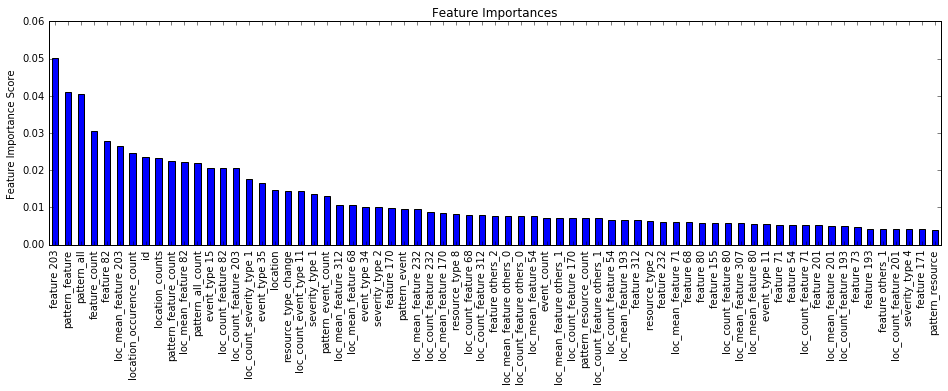

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4656    73   55
1.0               23  1843    5
2.0                0     0  726
Note: rows - actual; col - predicted
Train (Accuracy) : 97.886%
Train (log_loss) : 0.158441
AUC : nan%
CV Score (Specified Metric) : Mean - -0.531016 | Std - 0.016115


In [107]:
etc3.modelfit(performCV=True , printTopN=70)

In [108]:
etc3.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/etc3_model2.csv")

In [109]:
etc3.export_model(IDcol=[IDcol])

## Create DataFrame with OOF predictions of each

In [110]:
colrename = {"stack_pred_0":"stack_pred_0_xgb" , 
            "stack_pred_1":"stack_pred_1_xgb" , 
            "stack_pred_2":"stack_pred_2_xgb"}

In [111]:
test2 = test2.rename(columns=colrename)

In [112]:
train_h1 = train_h1.rename(columns=colrename)
train_h2 = train_h2.rename(columns=colrename)

In [131]:
rf4a = models_classification.Random_Forest_Class(train_h1 , train_h2 , target , predictors , cv_folds=5 , 
                                                scoring_metric="log_loss")

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 256, 'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


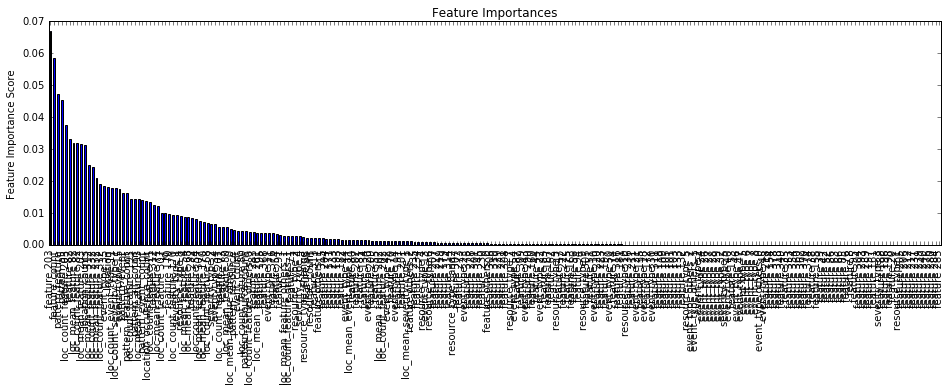

OOB Score : 0.709485


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             1776  406  210
1.0              103  725  107
2.0                5   20  338
Note: rows - actual; col - predicted
Train (Accuracy) : 76.938%
Train (log_loss) : 0.566598
AUC : nan%
CV Score (Specified Metric) : Mean - -0.651955 | Std - 0.022767


In [132]:
rf4a.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**8 , 
    "min_samples_split":2 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})
rf4a.modelfit(performCV = True)

In [115]:
rf4b = models_classification.Random_Forest_Class(train_h2 , train_h1 , target , predictors , cv_folds=5 , 
                                                scoring_metric = "log_loss")

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 256, 'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


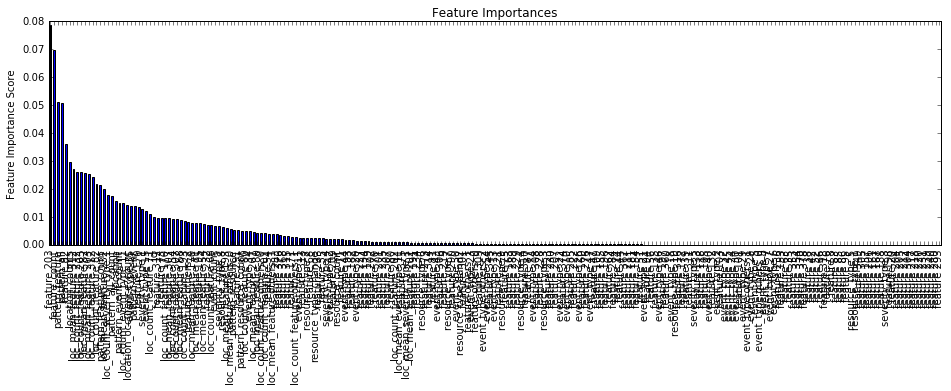

OOB Score : 0.721756


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             1821  397  174
1.0              107  717  112
2.0                6   16  341
Note: rows - actual; col - predicted
Train (Accuracy) : 78.001%
Train (log_loss) : 0.567047
AUC : nan%
CV Score (Specified Metric) : Mean - -0.653985 | Std - 0.015085


In [116]:
rf4b.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**8 , 
    "min_samples_split":2 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})

rf4b.modelfit(performCV = True)

In [117]:
rf4c = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                                scoring_metric = "log_loss")


Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 256, 'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


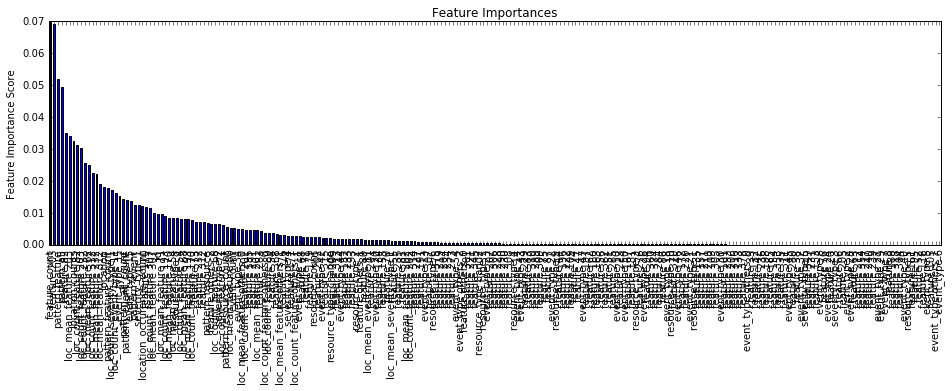

OOB Score : 0.741634


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             3647   774  363
1.0              216  1445  210
2.0                8    38  680
Note: rows - actual; col - predicted
Train (Accuracy) : 78.201%
Train (log_loss) : 0.545434
AUC : nan%
CV Score (Specified Metric) : Mean - -0.624552 | Std - 0.016339


In [118]:
rf4c.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**8 , 
    "min_samples_split":2 , 
    "min_samples_leaf":10 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})

rf4c.modelfit(performCV=True)

In [120]:
prefix = "rfgini"
colname = ["stack_pred_%d_%s"%(i , prefix) for i in range(0 , 3)]

In [121]:
train_h2[colname[0]] = 0
train_h2[colname[1]] = 0
train_h2[colname[2]] = 0
train_h2[colname] = rf4a.get_test_predictions(getprob=True)

In [122]:
train_h1[colname[0]] = 0
train_h1[colname[1]] = 0
train_h1[colname[2]] = 0
train_h1[colname] = rf4b.get_test_predictions(getprob=True)

In [123]:
test2[colname[0]] = 0
test2[colname[1]] = 0
test2[colname[2]] = 0
test2[colname] = rf4c.get_test_predictions(getprob=True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 1024, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


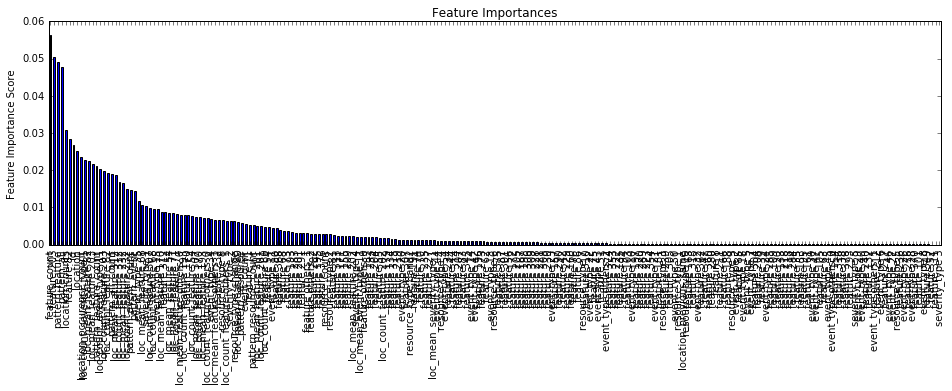

OOB Score : 0.766125


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2310   31   51
1.0                8  912   15
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 97.154%
Train (log_loss) : 0.231138
AUC : nan%
CV Score (Specified Metric) : Mean - -0.546737 | Std - 0.030258


In [126]:
rf6a = models_classification.Random_Forest_Class(train_h1 , train_h2 , target , predictors , cv_folds=5 , 
                                                scoring_metric = "log_loss")
rf6a.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**10 , 
    "min_samples_split":5 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})

rf6a.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 1024, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


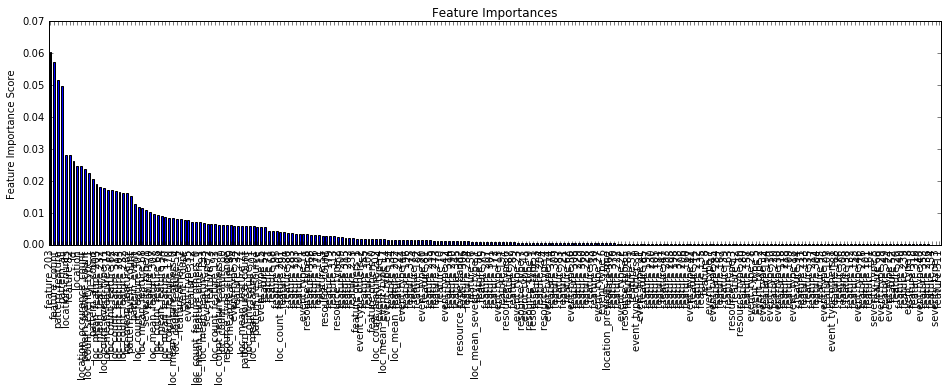

OOB Score : 0.756705


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2317   27   48
1.0                7  911   18
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 97.291%
Train (log_loss) : 0.232666
AUC : nan%
CV Score (Specified Metric) : Mean - -0.546269 | Std - 0.009130


In [133]:
rf6b = models_classification.Random_Forest_Class(train_h2 , train_h1 , target , predictors , cv_folds=5 , 
                                                scoring_metric = "log_loss")
rf6b.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**10 , 
    "min_samples_split":5 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})

rf6b.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': True, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 1024, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


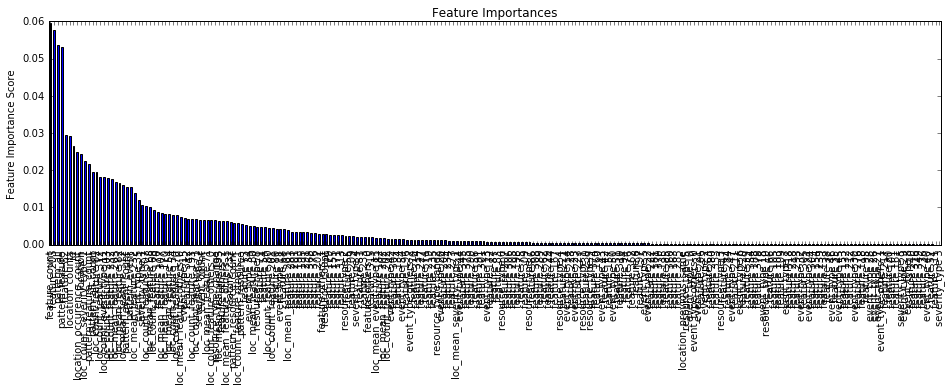

OOB Score : 0.775505


/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4585    92  107
1.0               34  1799   38
2.0                0     0  726
Note: rows - actual; col - predicted
Train (Accuracy) : 96.328%
Train (log_loss) : 0.235132
AUC : nan%
CV Score (Specified Metric) : Mean - -0.519345 | Std - 0.015844


In [134]:
rf6c = models_classification.Random_Forest_Class(train , test , target , predictors , cv_folds=5 , 
                                                scoring_metric = "log_loss")
rf6c.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**10 , 
    "min_samples_split":5 , 
    "max_features":"sqrt" , 
    "oob_score":True , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" ,
})

rf6c.modelfit(performCV = True)

In [135]:
prefix="rfentropy"
colnames = ["stack_pred_%d_%s"% (i , prefix) for i in range(0 , 3)]

In [136]:
train_h2[colnames[0]] = 0
train_h2[colnames[1]] = 0
train_h2[colnames[2]] = 0
train_h2[colnames] = rf6a.get_test_predictions(getprob=True)

In [137]:
train_h1[colnames[0]] = 0
train_h1[colnames[1]] = 0
train_h1[colnames[2]] = 0
train_h1[colnames] = rf6b.get_test_predictions(getprob=True)

In [138]:
test2[colnames[0]] = 0
test2[colnames[1]] = 0
test2[colnames[2]] = 0
test2[colnames] = rf6c.get_test_predictions(getprob=True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


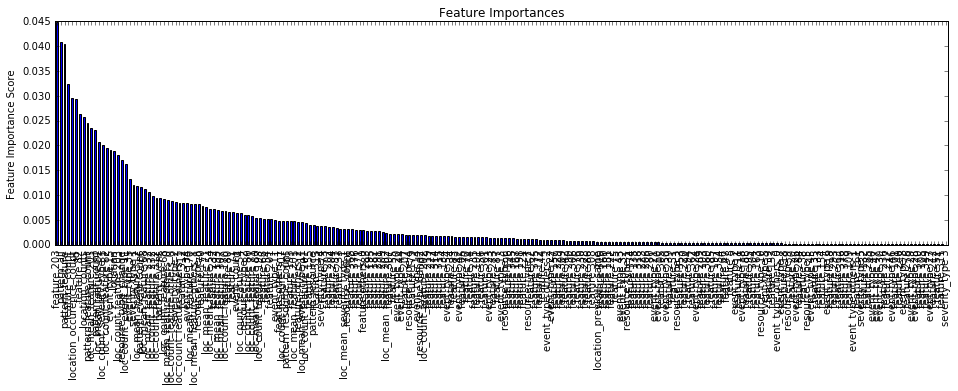

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2392    0    0
1.0                0  935    0
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 100.000%
Train (log_loss) : 0.000000
AUC : nan%
CV Score (Specified Metric) : Mean - -0.582060 | Std - 0.036620


In [139]:
etc3a = models_classification.ExtraTrees_Class(train_h1 , train_h2 , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc3a.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc3a.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


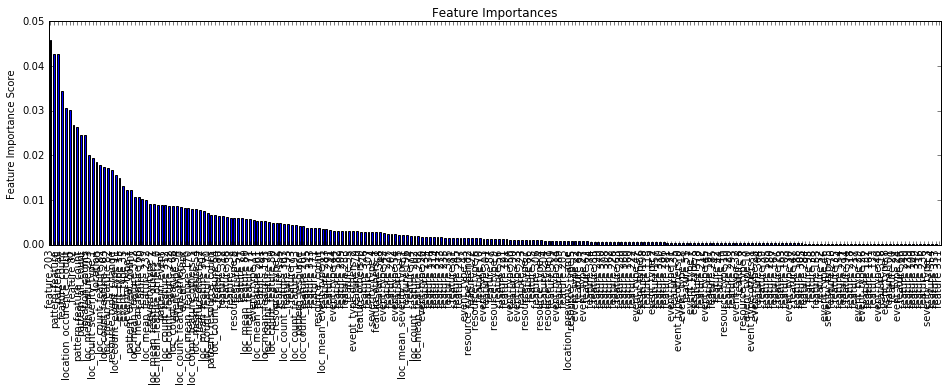

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2392    0    0
1.0                0  936    0
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 100.000%
Train (log_loss) : 0.000000
AUC : nan%
CV Score (Specified Metric) : Mean - -0.568043 | Std - 0.006360


In [140]:
etc3b = models_classification.ExtraTrees_Class(train_h2 , train_h1 , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc3b.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc3b.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


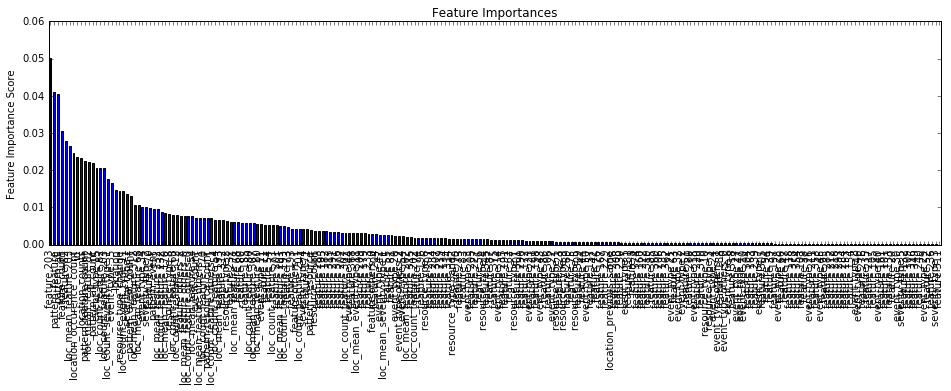

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4656    73   55
1.0               23  1843    5
2.0                0     0  726
Note: rows - actual; col - predicted
Train (Accuracy) : 97.886%
Train (log_loss) : 0.158441
AUC : nan%
CV Score (Specified Metric) : Mean - -0.531016 | Std - 0.016115


In [141]:
etc3c = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc3c.set_parameters({
    "criterion":"gini" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc3c.modelfit(performCV = True)

In [142]:
prefix = "etcgini"
colnames = ["stack_pred_%d_%s" % (i , prefix) for i in range(0 , 3)]

In [143]:
train_h2[colnames[0]] = 0
train_h2[colnames[1]] = 0
train_h2[colnames[2]] = 0
train_h2[colnames] = etc3a.get_test_predictions(getprob=True)

In [144]:
train_h1[colnames[0]] = 0
train_h1[colnames[1]] = 0
train_h1[colnames[2]] = 0
train_h1[colnames] = etc3b.get_test_predictions(getprob=True)

In [145]:
test2[colnames[0]] = 0
test2[colnames[1]] = 0
test2[colnames[2]] = 0
test2[colnames] = etc3c.get_test_predictions(getprob=True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


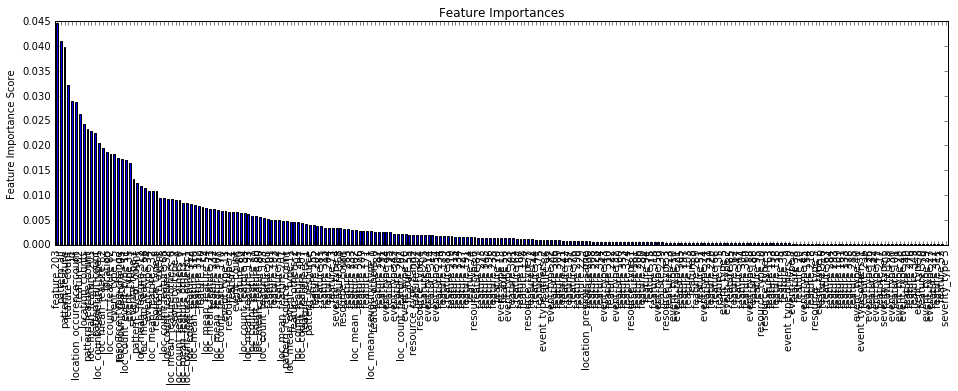

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2392    0    0
1.0                0  935    0
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 100.000%
Train (log_loss) : 0.000000
AUC : nan%
CV Score (Specified Metric) : Mean - -0.589910 | Std - 0.025606


In [146]:
etc4a = models_classification.ExtraTrees_Class(train_h1 , train_h2 , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc4a.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc4a.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


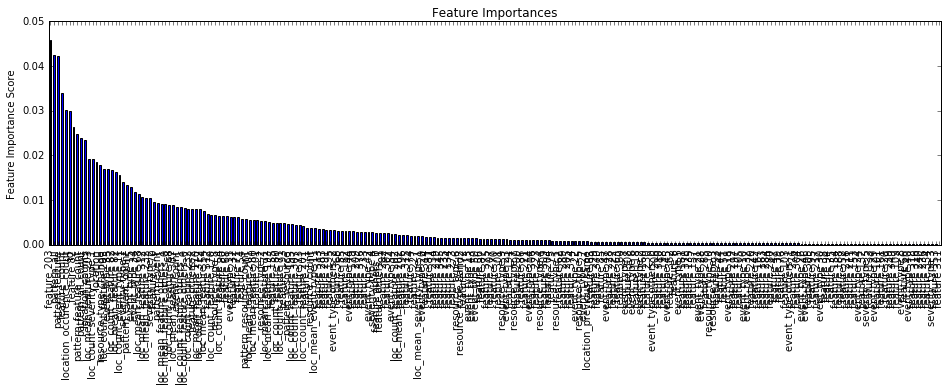

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0  1.0  2.0
fault_severity                
0.0             2392    0    0
1.0                0  936    0
2.0                0    0  363
Note: rows - actual; col - predicted
Train (Accuracy) : 100.000%
Train (log_loss) : 0.000000
AUC : nan%
CV Score (Specified Metric) : Mean - -0.567622 | Std - 0.005179


In [147]:
etc4b = models_classification.ExtraTrees_Class(train_h2 , train_h1 , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc4b.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc4b.modelfit(performCV = True)

Model being built with the following parameters:
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': 2048, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': 78, 'min_impurity_split': 1e-07, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample'}


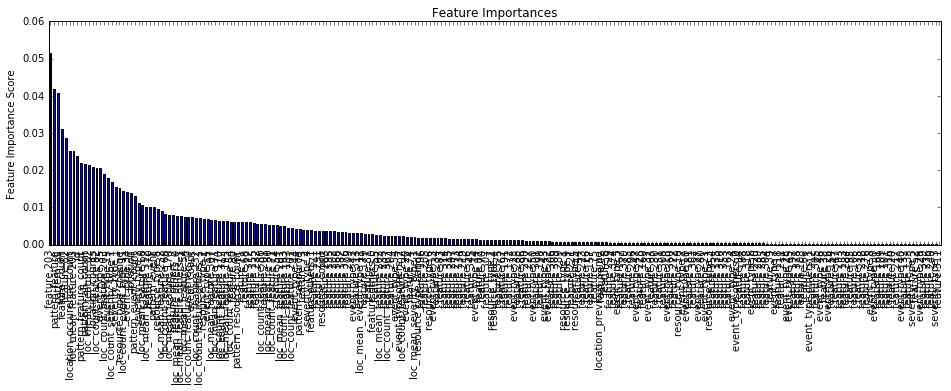

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4684    94    6
1.0               42  1829    0
2.0                0     0  726
Note: rows - actual; col - predicted
Train (Accuracy) : 98.076%
Train (log_loss) : 0.168663
AUC : nan%
CV Score (Specified Metric) : Mean - -0.536113 | Std - 0.022329


In [148]:
etc4c = models_classification.ExtraTrees_Class(train , test , target , predictors , cv_folds=5 , 
                                              scoring_metric = "log_loss")
etc4c.set_parameters({
    "criterion":"entropy" , 
    "n_estimators":500 , 
    "max_leaf_nodes":2**11 , 
    "min_samples_split":2 , 
    "max_features":"sqrt" , 
    "n_jobs":-1 , 
    "class_weight":"balanced_subsample" , 
    "random_state":78
})
etc4c.modelfit(performCV = True)

In [149]:
prefix = "etcentropy"
colnames = ["stack_pred_%d_%s"%(i , prefix) for i in range(0 , 3)]
train_h2[colnames[0]] = 0
train_h2[colnames[1]] = 0
train_h2[colnames[2]] = 0
train_h2[colnames] = etc4a.get_test_predictions(getprob=True)

In [150]:
train_h1[colnames[0]] = 0
train_h1[colnames[1]] = 0
train_h1[colnames[2]] = 0
train_h1[colnames] = etc4b.get_test_predictions(getprob=True)

In [151]:
test2[colnames[0]] = 0
test2[colnames[1]] = 0
test2[colnames[2]] = 0
test2[colnames] = etc4c.get_test_predictions(getprob=True)

In [152]:
train2 = pd.concat([train_h1 , train_h2] , ignore_index=True)

## Create Logistic Regression with Prediction Outpus

In [153]:
models_classification = reload(models_classification)

In [154]:
pred_logistic = [x for x in train_h1.columns if x.startswith("stack_pred_")]

In [155]:
logreg1 = models_classification.Logistic_Regression(train2 , test2 , target , pred_logistic , scoring_metric="log_loss")

In [156]:
train2.shape , test2.shape

((7381, 252), (11171, 251))

In [160]:
logreg1.set_parameters({
    "solver":"lbfgs" , 
    "multi_class":"multinomial"
})
logreg1.modelfit(performCV=True)

Model being built with the following parameters:
{'warm_start': False, 'C': 1.0, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'multinomial', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'lbfgs', 'class_weight': 'balanced'}
Coefficients: 
                         coef_class_0  coef_class_1  coef_class_2
stack_pred_0_xgb             1.139995     -0.466446     -0.673549
stack_pred_1_xgb            -0.522768      1.389934     -0.867166
stack_pred_2_xgb            -0.700149     -0.871209      1.571358
stack_pred_0_rfgini          1.159905      0.624615     -1.784520
stack_pred_1_rfgini         -0.422561      0.551435     -0.128874
stack_pred_2_rfgini         -0.820267     -1.123773      1.944040
stack_pred_0_rfentropy       0.273366     -0.603473      0.330108
stack_pred_1_rfentropy      -0.501518      0.177064      0.324454
stack_pred_2_rfentropy       0.145229      0.478688     -0.623917
stack_p

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             3673   828  283
1.0              334  1345  192
2.0               32    87  607
Note: rows - actual; col - predicted
Train (Accuracy) : 76.209%
Train (log_loss) : 0.624252
AUC : nan%
CV Score (Specified Metric) : Mean - -0.626575 | Std - 0.032809


## Use outcomes as features in xgboost

In [161]:
predictors = [x for x in train2.columns if x not in [target , "location2" , IDcol]]

In [162]:
predictors = [x for x in predictors if not x.startswith("occurence")]

In [164]:
xgb13 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [165]:
s

9055

[0]	train-mlogloss:1.08986+1.55897e-05	test-mlogloss:1.09043+8.64671e-05
[1]	train-mlogloss:1.08134+1.97079e-05	test-mlogloss:1.08251+0.000142868
[2]	train-mlogloss:1.07295+4.94465e-05	test-mlogloss:1.07472+0.000226775
[3]	train-mlogloss:1.06473+7.3733e-05	test-mlogloss:1.06704+0.000336175
[4]	train-mlogloss:1.05658+0.000165708	test-mlogloss:1.05949+0.000371381
[5]	train-mlogloss:1.04863+0.000223983	test-mlogloss:1.05213+0.000482584
[6]	train-mlogloss:1.04083+0.00032109	test-mlogloss:1.04488+0.000506229
[7]	train-mlogloss:1.03305+0.000334011	test-mlogloss:1.03766+0.000544484
[8]	train-mlogloss:1.02537+0.000365156	test-mlogloss:1.03059+0.000590237
[9]	train-mlogloss:1.01789+0.000360593	test-mlogloss:1.02364+0.000664922
[10]	train-mlogloss:1.01046+0.00038665	test-mlogloss:1.01675+0.000743293
[11]	train-mlogloss:1.00323+0.000414748	test-mlogloss:1.01004+0.000804456
[12]	train-mlogloss:0.996028+0.000442728	test-mlogloss:1.00338+0.000855063
[13]	train-mlogloss:0.988981+0.000467289	test-mlog

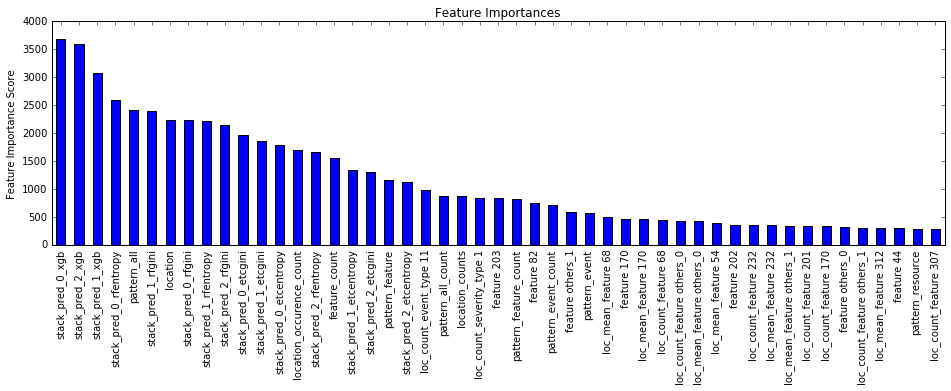


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4372   318   94
1.0              400  1402   69
2.0               47    39  640
Note: rows - actual; col - predicted
Train (Accuracy) : 86.899%
Train (log_loss) : 0.330974
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [166]:
xgb13.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":8 , 
    "scale_pos_weight":1 ,
})

xgb13.modelfit(useTrainCV=True , performCV=False , printTopN=50)

In [167]:
xgb13b = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb13b.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":-1 , 
    "scale_pos_weight":1 ,
})
param_test7 = {
    "max_depth":range(4 , 10) , 
    "min_child_weight":range(1 , 6)
}

xgb13b.GridSearch(param_test7 , n_jobs=-1 , iid=False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
    max_depth  min_child_weight    meanCV     stdCV
0           4                 1 -0.514310  0.008347
1           4                 2 -0.514636  0.008107
2           4                 3 -0.515160  0.008180
3           4                 4 -0.515716  0.008397
4           4                 5 -0.516188  0.008694
5           5                 1 -0.519440  0.008375
6           5                 2 -0.519254  0.008302
7           5                 3 -0.519031  0.008014
8           5                 4 -0.519645  0.008288
9           5                 5 -0.519882  0.008241
10          6                 1 -0.528521  0.008925
11          6                 2 -0.526580  0.008641
12          6                 3 -0.525492  0.008883
13          6                 4 -0.525249  0.008790
14          6                 5 -0.524901  0.008941
15          7                 1 -0.539136  0.009496
16          7                 2 -0.535568  0.009373
17          7                 3 -0.533574  

[0]	train-mlogloss:1.08986+1.55897e-05	test-mlogloss:1.09043+8.64671e-05
[1]	train-mlogloss:1.08134+1.97079e-05	test-mlogloss:1.08251+0.000142868
[2]	train-mlogloss:1.07295+4.94465e-05	test-mlogloss:1.07472+0.000226775
[3]	train-mlogloss:1.06473+7.3733e-05	test-mlogloss:1.06704+0.000336175
[4]	train-mlogloss:1.05658+0.000165708	test-mlogloss:1.05949+0.000371381
[5]	train-mlogloss:1.04863+0.000223983	test-mlogloss:1.05213+0.000482584
[6]	train-mlogloss:1.04083+0.00032109	test-mlogloss:1.04488+0.000506229
[7]	train-mlogloss:1.03305+0.000334011	test-mlogloss:1.03766+0.000544484
[8]	train-mlogloss:1.02537+0.000365156	test-mlogloss:1.03059+0.000590237
[9]	train-mlogloss:1.01789+0.000360593	test-mlogloss:1.02364+0.000664922
[10]	train-mlogloss:1.01046+0.00038665	test-mlogloss:1.01675+0.000743293
[11]	train-mlogloss:1.00323+0.000414748	test-mlogloss:1.01004+0.000804456
[12]	train-mlogloss:0.996028+0.000442728	test-mlogloss:1.00338+0.000855063
[13]	train-mlogloss:0.988981+0.000467289	test-mlog

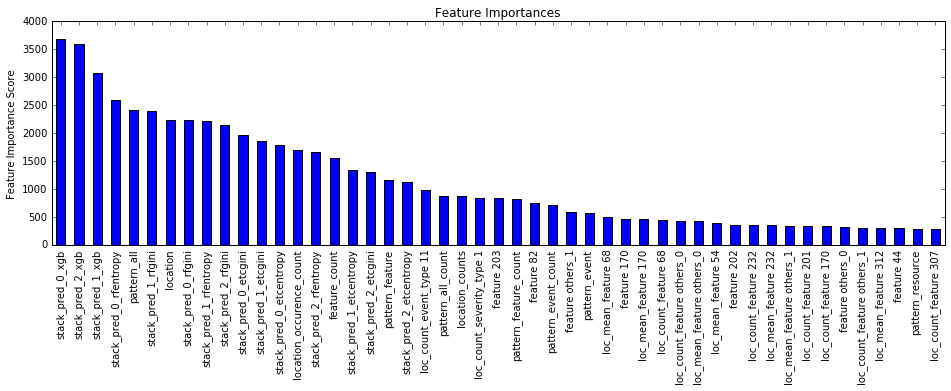


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4372   318   94
1.0              400  1402   69
2.0               47    39  640
Note: rows - actual; col - predicted
Train (Accuracy) : 86.899%
Train (log_loss) : 0.330974
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [169]:
xgb13c = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb13c.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0 , 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":-1 , 
    "scale_pos_weight":1 ,
})
xgb13c.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

[0]	train-mlogloss:1.08986+1.55897e-05	test-mlogloss:1.09043+8.64671e-05
[1]	train-mlogloss:1.08134+1.97079e-05	test-mlogloss:1.08251+0.000142001
[2]	train-mlogloss:1.07295+4.96411e-05	test-mlogloss:1.07473+0.000225956
[3]	train-mlogloss:1.06473+7.38257e-05	test-mlogloss:1.06704+0.000335548
[4]	train-mlogloss:1.05658+0.00016563	test-mlogloss:1.05949+0.000371108
[5]	train-mlogloss:1.04863+0.000223992	test-mlogloss:1.05213+0.000483063
[6]	train-mlogloss:1.04083+0.000321682	test-mlogloss:1.04488+0.000505905
[7]	train-mlogloss:1.03305+0.000333813	test-mlogloss:1.03766+0.000544399
[8]	train-mlogloss:1.02537+0.000364915	test-mlogloss:1.03058+0.000590635
[9]	train-mlogloss:1.01789+0.000360225	test-mlogloss:1.02364+0.000664598
[10]	train-mlogloss:1.01046+0.000386363	test-mlogloss:1.01675+0.000743271
[11]	train-mlogloss:1.00323+0.000414805	test-mlogloss:1.01004+0.000803835
[12]	train-mlogloss:0.99603+0.000442176	test-mlogloss:1.00338+0.000852763
[13]	train-mlogloss:0.988982+0.000466487	test-mlo

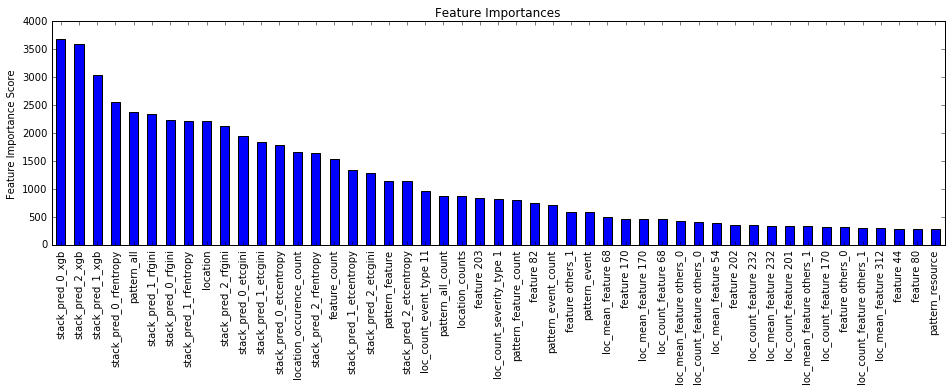


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4374   318   92
1.0              396  1405   70
2.0               48    39  639
Note: rows - actual; col - predicted
Train (Accuracy) : 86.953%
Train (log_loss) : 0.331077
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [171]:
xgb13d = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb13d.set_parameters({
    "learning_rate":0.01 , 
    "n_estimators":2000 , 
    "max_depth":6 ,
    "min_child_weight":1 , 
    "gamma":0.1, 
    "subsample":0.8 , 
    "colsample_bytree":0.55 , 
    "objective":"multi:softprob" , 
    "num_class":3 , 
    "eval_metric":["mlogloss"] , 
    "missing":-1 , 
    "nthread":-1 , 
    "scale_pos_weight":1 ,
})
xgb13d.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

In [172]:
xgb13d.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb13d_model2.csv")

In [173]:
xgb13c.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb13c_mdeol2.csv")

{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


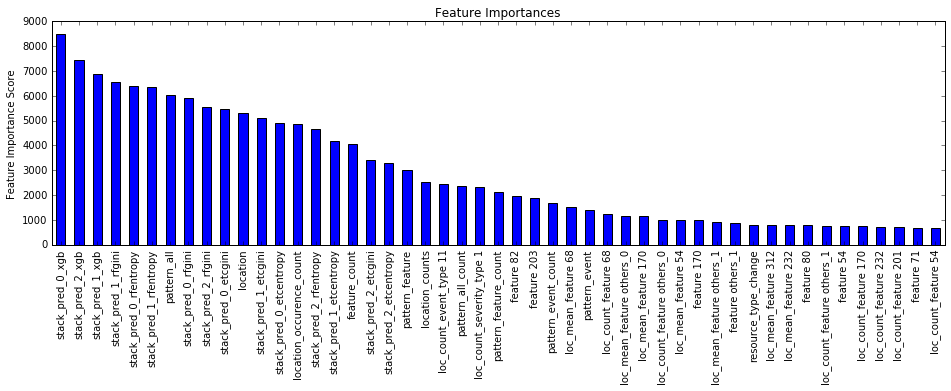


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4711    66    7
1.0              147  1720    4
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 96.897%
Train (log_loss) : 0.194898
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 1100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


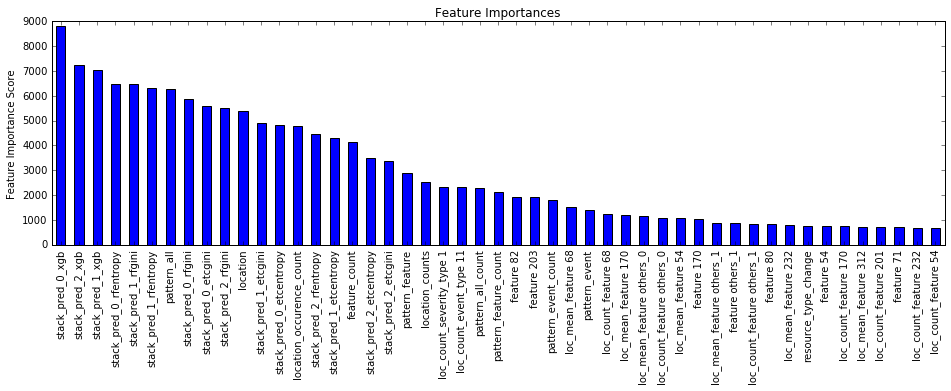


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    59    7
1.0              150  1719    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.992%
Train (log_loss) : 0.194662
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 2100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


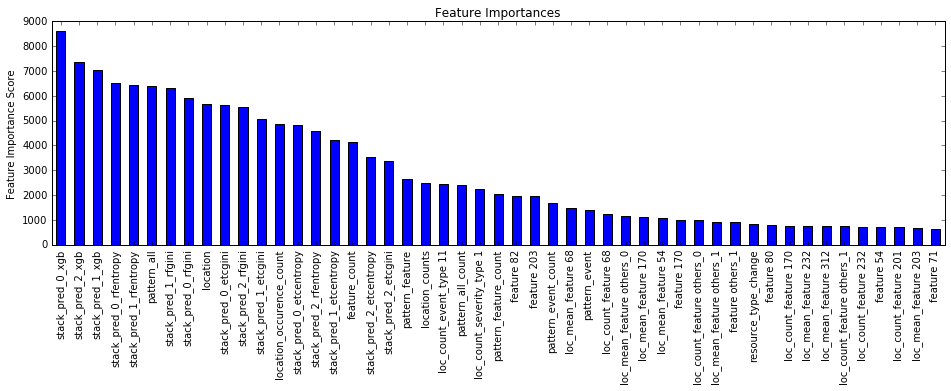


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4716    63    5
1.0              151  1718    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.952%
Train (log_loss) : 0.194747
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 3100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


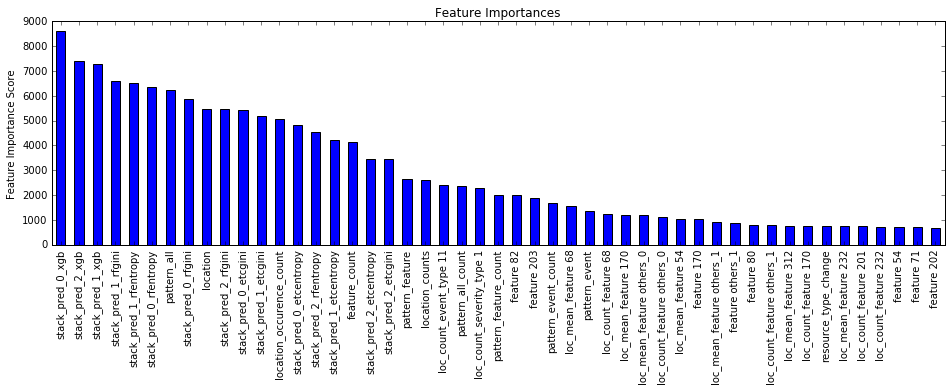


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    62    7
1.0              142  1728    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.087%
Train (log_loss) : 0.194656
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 4100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


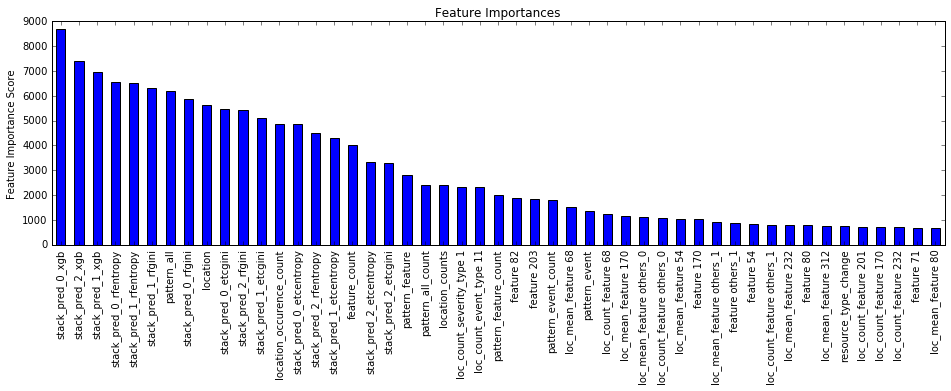


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4712    64    8
1.0              146  1723    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.965%
Train (log_loss) : 0.195224
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 5100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


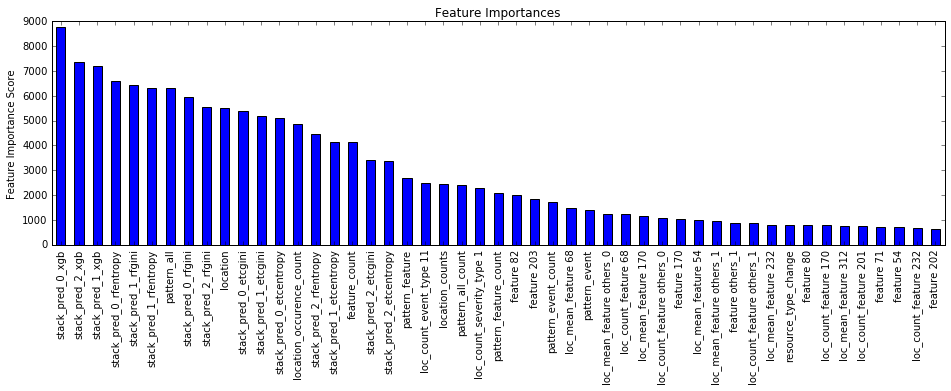


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    61    8
1.0              143  1727    1
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 97.046%
Train (log_loss) : 0.194030
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 6100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


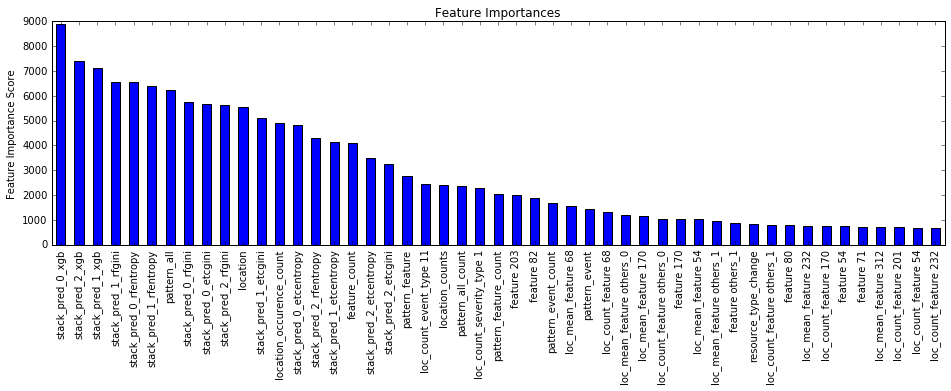


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4719    60    5
1.0              148  1721    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 97.033%
Train (log_loss) : 0.193932
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 7100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


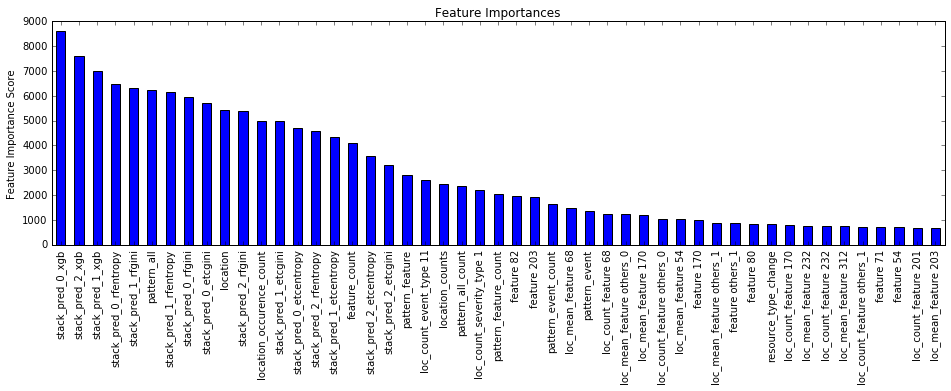


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    59    7
1.0              149  1721    1
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 97.006%
Train (log_loss) : 0.195479
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 8100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


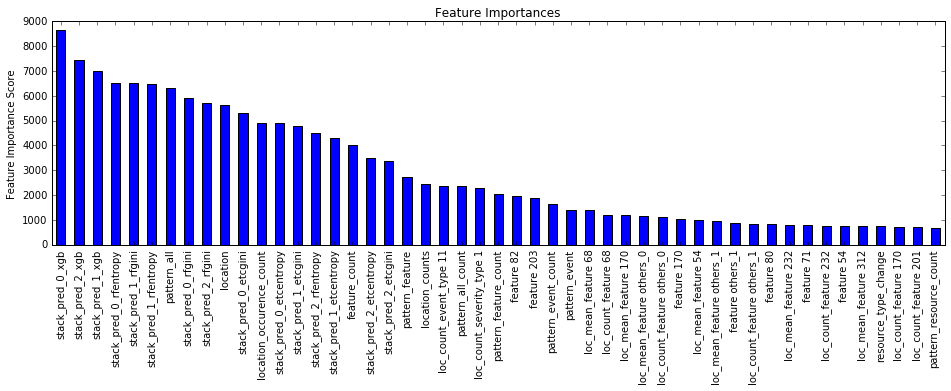


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4708    68    8
1.0              142  1727    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.965%
Train (log_loss) : 0.194825
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 0, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 9100, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


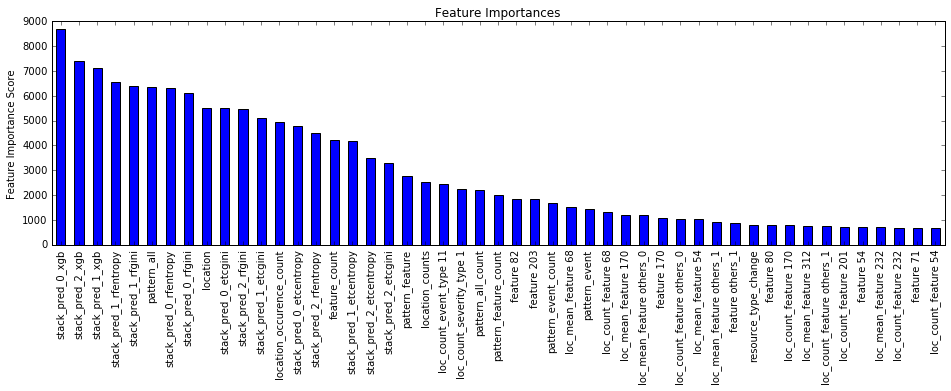


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    61    8
1.0              149  1720    2
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 96.952%
Train (log_loss) : 0.194985
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [174]:
for s in range(100 , 10000 , 1000):
    xgb14 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb14.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
        "seed":s
    })
    
    xgb14.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb14_model2_seed%d.csv" % s
    xgb14.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [176]:
model_comb = ["submission/xgb14_model2_seed%d.csv"%s for s in range(100 , 10000 , 1000)]
combine_models_multi(model_comb , "submission/xgb14_model2_seedcombo.csv")

True


## Try Regularization with xgboost

In [177]:
xgb15 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [178]:
xgb15.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
        "seed":27
    })
param_test9 = {
    "reg_alpha":[1e-10 , 1e-5 , 0.1 , 1 , 100]
}

In [179]:
xgb15.GridSearch(param_test9 , n_jobs=-1 , iid=False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
      reg_alpha    meanCV     stdCV
0  1.000000e-10 -0.528147  0.009425
1  1.000000e-05 -0.528122  0.009379
2  1.000000e-01 -0.528781  0.009611
3  1.000000e+00 -0.530653  0.008377
4  1.000000e+02 -0.537721  0.006021

Best Parameters:  {'reg_alpha': 1e-05}

Best Score:  -0.528121582761


In [180]:
xgb16 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")

In [181]:
xgb16.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
        "seed":27
    })

param_test10 = {
    "reg_lambda":[0 , 1e-5 , 0.1 , 1],
}

In [182]:
xgb16.GridSearch(param_test10 , n_jobs=-1 , iid=False , cv=5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
   reg_lambda    meanCV     stdCV
0     0.00000 -0.528387  0.009589
1     0.00001 -0.528448  0.009568
2     0.10000 -0.528274  0.009561
3     1.00000 -0.528122  0.009379

Best Parameters:  {'reg_lambda': 1}

Best Score:  -0.528121582761


In [183]:
xgb16b = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb16b.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":8 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":1,
        "seed":27
    })

param_test11 = {
    "reg_lambda":[0.1 , 1 , 10 , 100],
}

xgb16b.GridSearch(param_test11 , n_jobs=8 , iid = False , cv = 5)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/root/anaconda2/envs/tensor/lib/python2.7/site-packages/skle

Grid Search Results:
   reg_lambda    meanCV     stdCV
0         0.1 -0.528274  0.009561
1         1.0 -0.528122  0.009379
2        10.0 -0.523363  0.009080
3       100.0 -0.511927  0.007112

Best Parameters:  {'reg_lambda': 100}

Best Score:  -0.511927421974


[0]	train-mlogloss:1.0899+4.07068e-05	test-mlogloss:1.09048+0.000122948
[1]	train-mlogloss:1.08133+6.64813e-05	test-mlogloss:1.08257+0.000246013
[2]	train-mlogloss:1.07296+6.76946e-05	test-mlogloss:1.07478+0.000347101
[3]	train-mlogloss:1.06464+8.79486e-05	test-mlogloss:1.06705+0.00038472
[4]	train-mlogloss:1.0565+8.43754e-05	test-mlogloss:1.05949+0.000467448
[5]	train-mlogloss:1.04849+0.000101132	test-mlogloss:1.05204+0.000522816
[6]	train-mlogloss:1.04066+0.000113383	test-mlogloss:1.04473+0.000631435
[7]	train-mlogloss:1.03295+6.18566e-05	test-mlogloss:1.03754+0.0007099
[8]	train-mlogloss:1.02534+4.73134e-05	test-mlogloss:1.03051+0.000762556
[9]	train-mlogloss:1.01782+6.6943e-05	test-mlogloss:1.02354+0.000807221
[10]	train-mlogloss:1.01046+6.80459e-05	test-mlogloss:1.01671+0.0009136
[11]	train-mlogloss:1.00322+0.000110262	test-mlogloss:1.01003+0.000969272
[12]	train-mlogloss:0.996081+0.000133501	test-mlogloss:1.0034+0.00100606
[13]	train-mlogloss:0.989032+0.000175425	test-mlogloss:0.

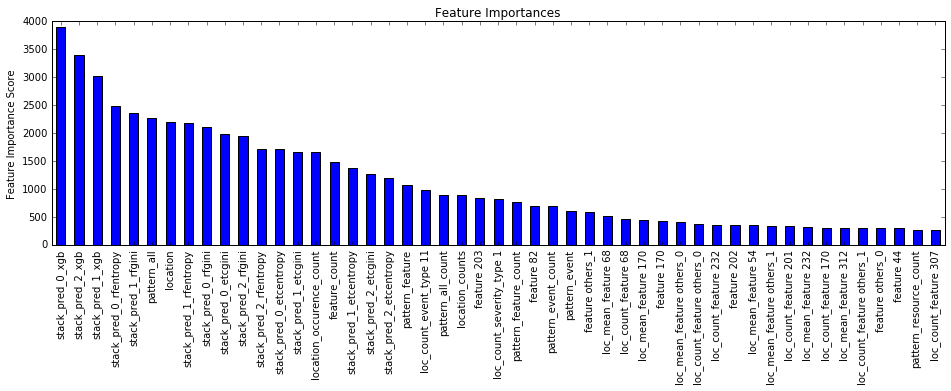


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4367   323   94
1.0              403  1394   74
2.0               49    36  641
Note: rows - actual; col - predicted
Train (Accuracy) : 86.736%
Train (log_loss) : 0.334048
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [186]:
xgb17 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb17.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":1,
        "seed":27
    })

xgb17.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

[0]	train-mlogloss:1.09129+3.6967e-05	test-mlogloss:1.09148+8.21764e-05
[1]	train-mlogloss:1.08407+7.19683e-05	test-mlogloss:1.08445+0.000196579
[2]	train-mlogloss:1.07698+8.25843e-05	test-mlogloss:1.07755+0.000281458
[3]	train-mlogloss:1.06997+5.87728e-05	test-mlogloss:1.07072+0.000296841
[4]	train-mlogloss:1.06306+5.38256e-05	test-mlogloss:1.06397+0.00032702
[5]	train-mlogloss:1.05624+8.27367e-05	test-mlogloss:1.05737+0.00031847
[6]	train-mlogloss:1.04954+0.000138943	test-mlogloss:1.05087+0.000354971
[7]	train-mlogloss:1.04298+8.35622e-05	test-mlogloss:1.04446+0.000467992
[8]	train-mlogloss:1.0365+0.000136347	test-mlogloss:1.03816+0.000503625
[9]	train-mlogloss:1.0301+0.000166196	test-mlogloss:1.03194+0.000515307
[10]	train-mlogloss:1.02382+0.000206524	test-mlogloss:1.02582+0.000574822
[11]	train-mlogloss:1.01764+0.000251468	test-mlogloss:1.01981+0.000594776
[12]	train-mlogloss:1.01152+0.000215454	test-mlogloss:1.01383+0.000620588
[13]	train-mlogloss:1.00549+0.000234535	test-mlogloss

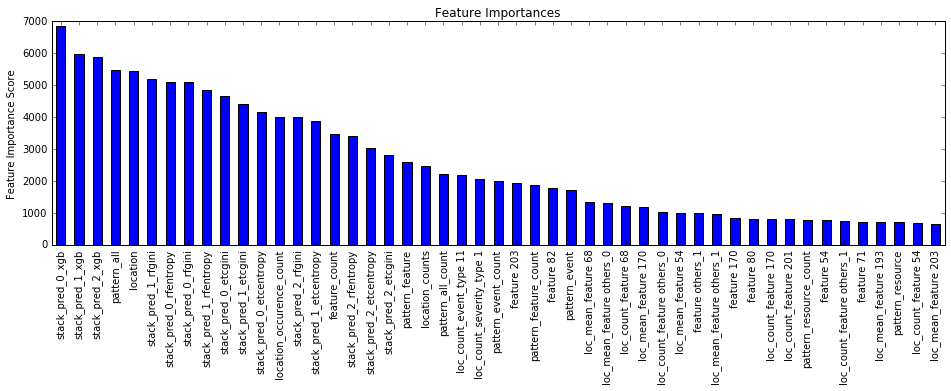


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4306   354  124
1.0              451  1322   98
2.0               62    60  604
Note: rows - actual; col - predicted
Train (Accuracy) : 84.433%
Train (log_loss) : 0.382357
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [187]:
xgb17b = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb17b.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":100,
        "seed":27
    })

xgb17b.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

[0]	train-mlogloss:1.0898+4.77703e-05	test-mlogloss:1.09044+0.000113267
[1]	train-mlogloss:1.08114+6.81128e-05	test-mlogloss:1.08251+0.0002479
[2]	train-mlogloss:1.07269+7.81793e-05	test-mlogloss:1.07467+0.000340849
[3]	train-mlogloss:1.06429+0.000102675	test-mlogloss:1.06692+0.000371872
[4]	train-mlogloss:1.05607+0.000115112	test-mlogloss:1.05928+0.000477736
[5]	train-mlogloss:1.04798+0.000123219	test-mlogloss:1.05178+0.000528977
[6]	train-mlogloss:1.04008+0.000146094	test-mlogloss:1.04444+0.00063567
[7]	train-mlogloss:1.03231+0.000116702	test-mlogloss:1.03726+0.000726332
[8]	train-mlogloss:1.02461+9.74835e-05	test-mlogloss:1.0302+0.000779807
[9]	train-mlogloss:1.01702+0.000102939	test-mlogloss:1.02322+0.000850899
[10]	train-mlogloss:1.00959+0.000100117	test-mlogloss:1.01637+0.000928922
[11]	train-mlogloss:1.00229+0.000121218	test-mlogloss:1.00968+0.000996892
[12]	train-mlogloss:0.995074+0.000166585	test-mlogloss:1.00302+0.00102161
[13]	train-mlogloss:0.987957+0.000201438	test-mloglos

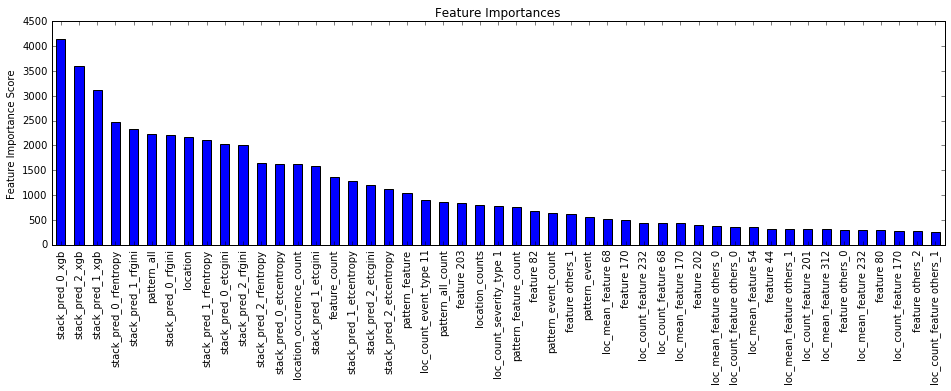


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4379   314   91
1.0              383  1426   62
2.0               38    33  655
Note: rows - actual; col - predicted
Train (Accuracy) : 87.522%
Train (log_loss) : 0.321602
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [188]:
xgb17c = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb17c.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":0.1,
        "seed":27
    })

xgb17c.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

[0]	train-mlogloss:1.08979+4.74864e-05	test-mlogloss:1.09044+0.000116815
[1]	train-mlogloss:1.08112+6.0288e-05	test-mlogloss:1.08249+0.000243931
[2]	train-mlogloss:1.07266+8.02262e-05	test-mlogloss:1.07464+0.000333852
[3]	train-mlogloss:1.06425+9.56515e-05	test-mlogloss:1.0669+0.00040026
[4]	train-mlogloss:1.05603+9.98447e-05	test-mlogloss:1.05927+0.000509318
[5]	train-mlogloss:1.04792+0.00010866	test-mlogloss:1.05176+0.00055524
[6]	train-mlogloss:1.04+0.000114755	test-mlogloss:1.04442+0.000667062
[7]	train-mlogloss:1.03223+0.000116663	test-mlogloss:1.03721+0.000754081
[8]	train-mlogloss:1.02451+0.000100246	test-mlogloss:1.03015+0.000793323
[9]	train-mlogloss:1.0169+9.83878e-05	test-mlogloss:1.02316+0.000867084
[10]	train-mlogloss:1.00946+0.000109339	test-mlogloss:1.01632+0.000940054
[11]	train-mlogloss:1.00216+0.000121465	test-mlogloss:1.00963+0.00100065
[12]	train-mlogloss:0.994934+0.000161789	test-mlogloss:1.00295+0.00102978
[13]	train-mlogloss:0.987811+0.000196147	test-mlogloss:0.9

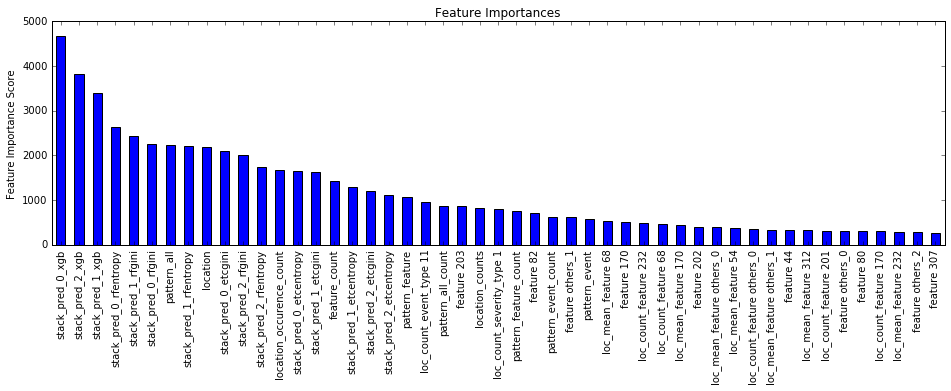


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4381   313   90
1.0              382  1424   65
2.0               38    30  658
Note: rows - actual; col - predicted
Train (Accuracy) : 87.563%
Train (log_loss) : 0.321172
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [189]:
xgb17d = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                           scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
xgb17d.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":0.01,
        "seed":27
    })

xgb17d.modelfit(useTrainCV = True , performCV = False , printTopN = 50)

In [190]:
xgb17d.submission_proba(IDcol=[IDcol] , proba_colnames=output_colname , filename="submission/xgb17d_model2.csv")

{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 99, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


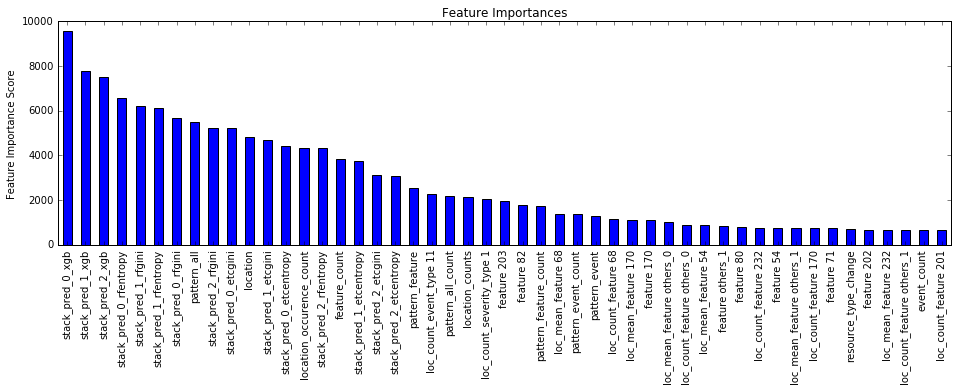


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    60    6
1.0              143  1728    0
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.128%
Train (log_loss) : 0.192221
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 1099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


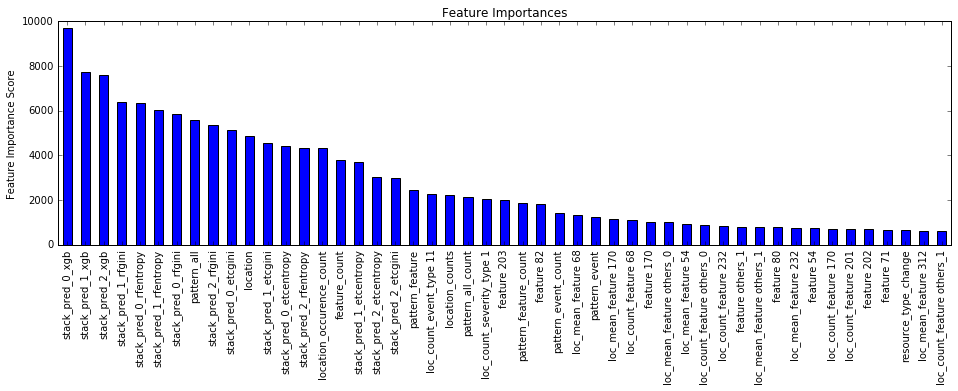


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4712    66    6
1.0              140  1728    3
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.046%
Train (log_loss) : 0.192638
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 2099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


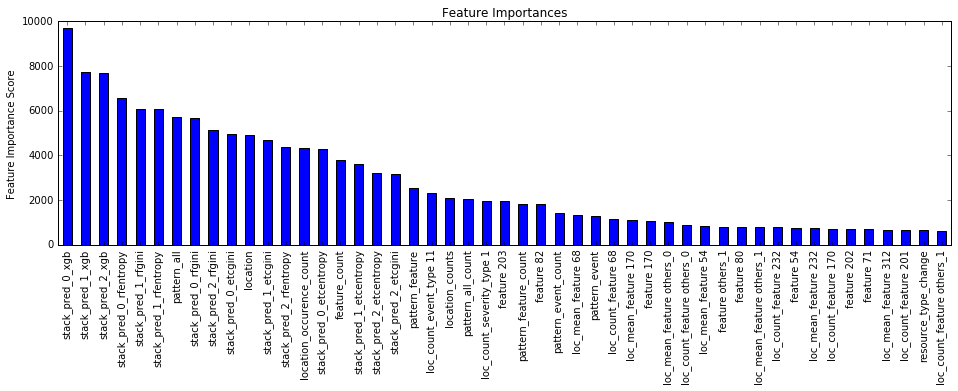


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    64    5
1.0              145  1725    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.046%
Train (log_loss) : 0.193161
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 3099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


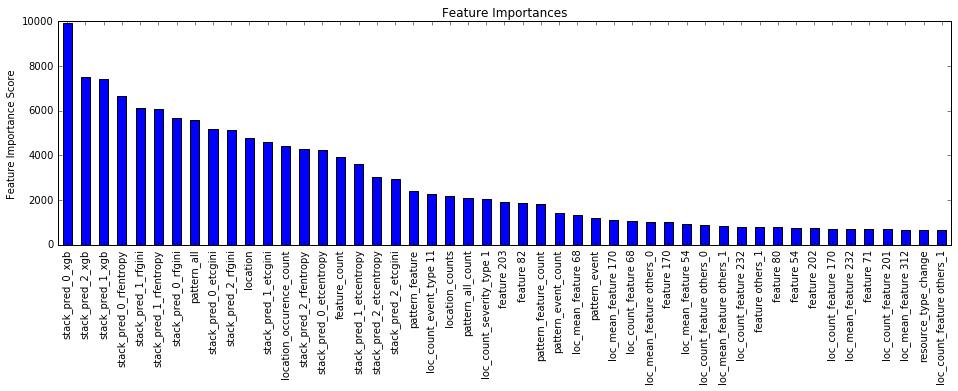


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4714    64    6
1.0              141  1729    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.087%
Train (log_loss) : 0.193194
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 4099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


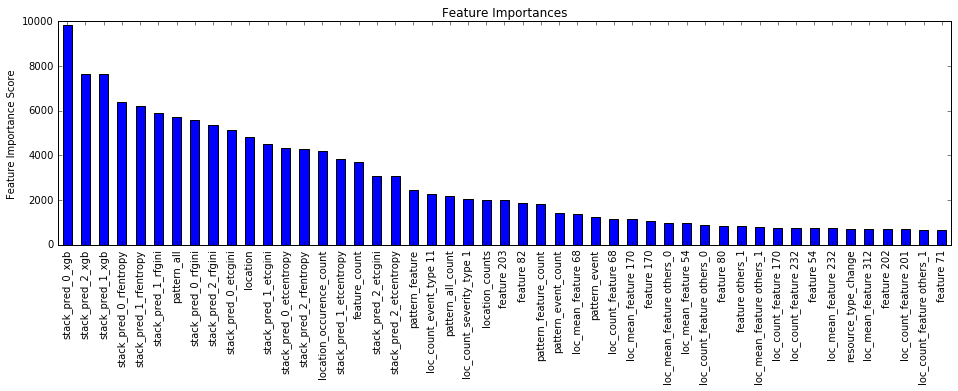


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4719    60    5
1.0              142  1728    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.141%
Train (log_loss) : 0.192947
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 5099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


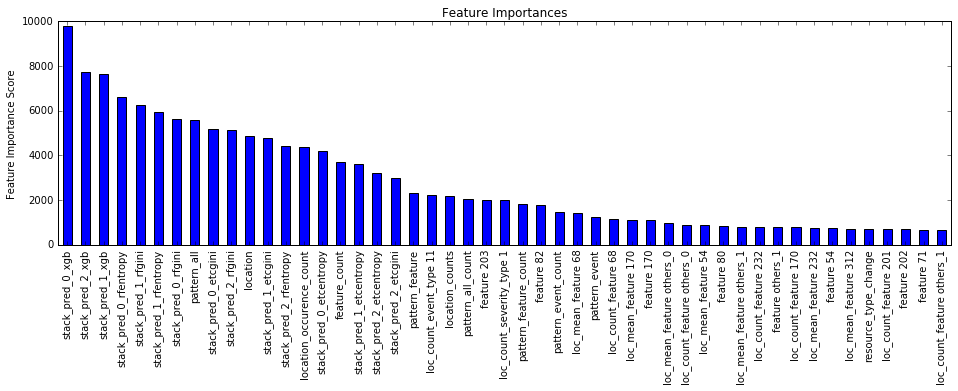


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4716    62    6
1.0              142  1727    2
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.087%
Train (log_loss) : 0.192212
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 6099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


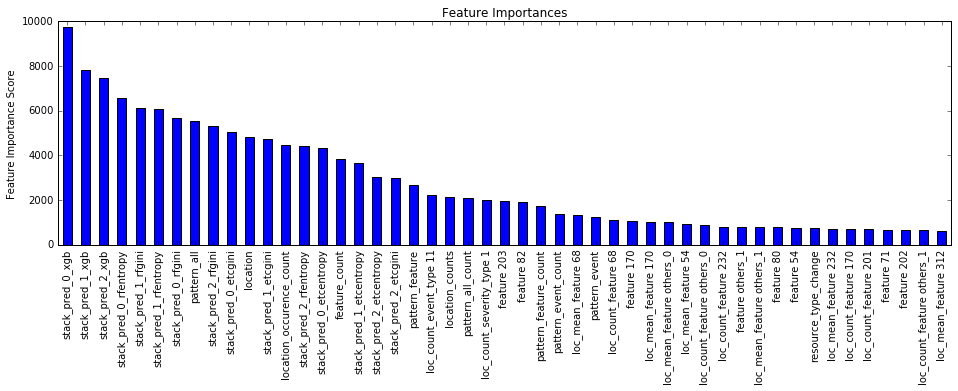


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4717    63    4
1.0              144  1726    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.087%
Train (log_loss) : 0.192856
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 7099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


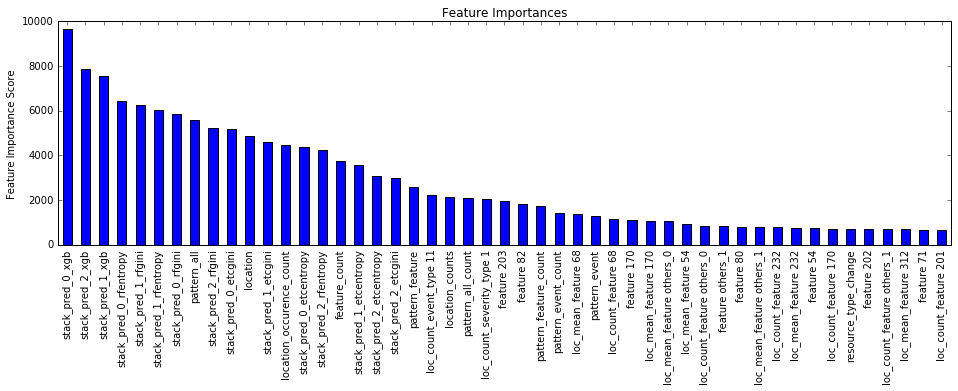


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    61    5
1.0              138  1730    3
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.155%
Train (log_loss) : 0.192239
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 8099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


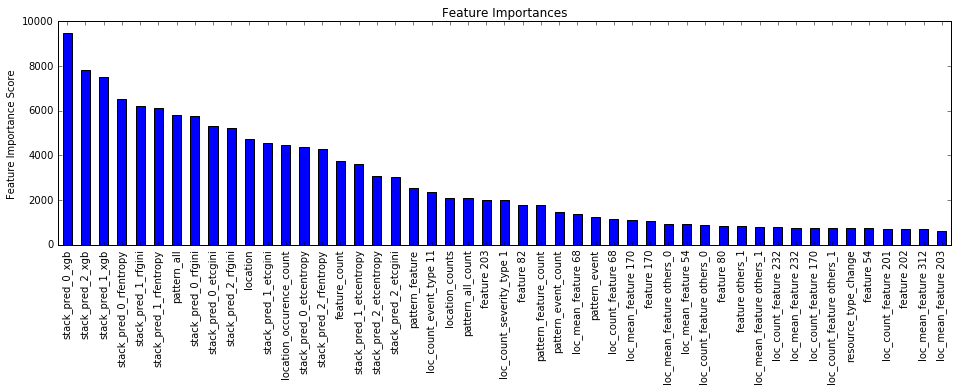


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4713    65    6
1.0              136  1734    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.141%
Train (log_loss) : 0.192248
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.01, 'seed': 9099, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


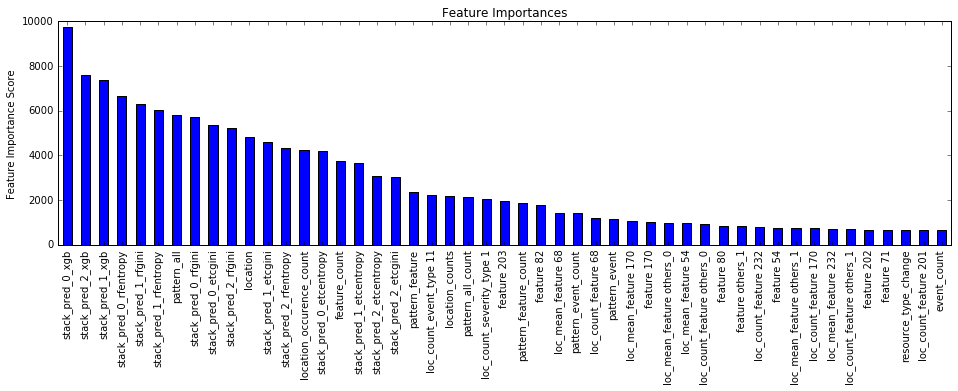


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    61    5
1.0              142  1728    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.128%
Train (log_loss) : 0.192378
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [191]:
for s in range(99 , 10000 , 1000):
    xgb18 = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb18.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":0.01,
        "seed":s
    })
    xgb18.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb18_model2_seed%d.csv"%s
    xgb18.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [198]:
model_comb = ["submission/xgb18_model2_seed%d.csv"%s for s in range(99 , 10000 , 1000)]

In [199]:
combine_models_multi(model_comb , "submission/xgb18_model2_seedcombo.csv")

True


{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 88, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


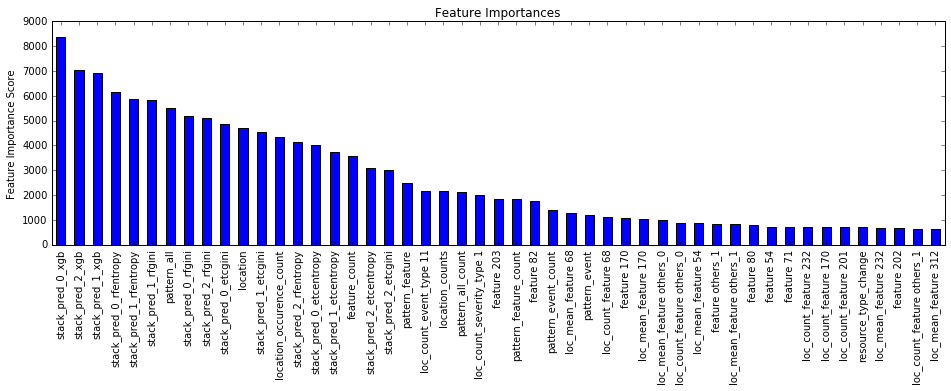


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4717    62    5
1.0              142  1728    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.114%
Train (log_loss) : 0.192932
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 1088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


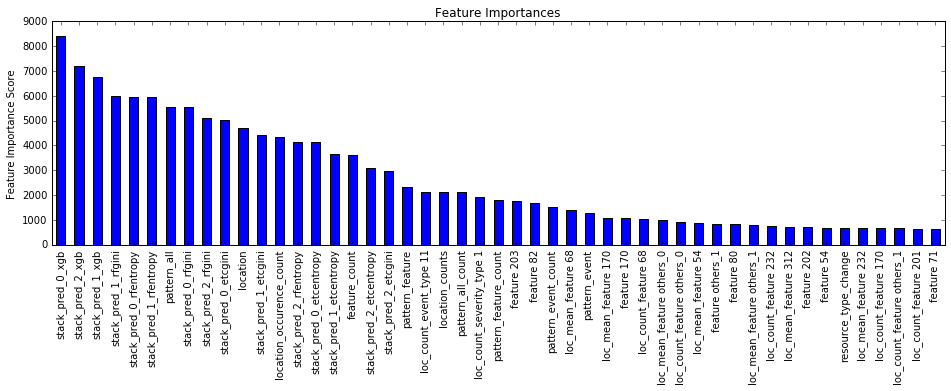


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4713    65    6
1.0              137  1733    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.128%
Train (log_loss) : 0.192761
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 2088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


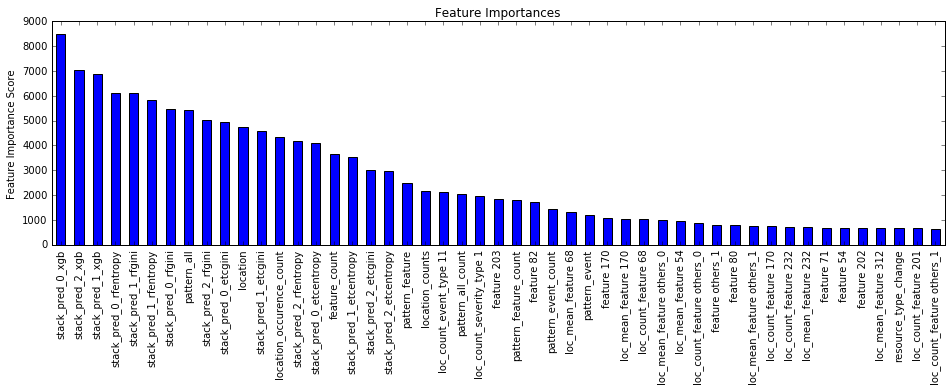


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4718    60    6
1.0              141  1729    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.141%
Train (log_loss) : 0.193374
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 3088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


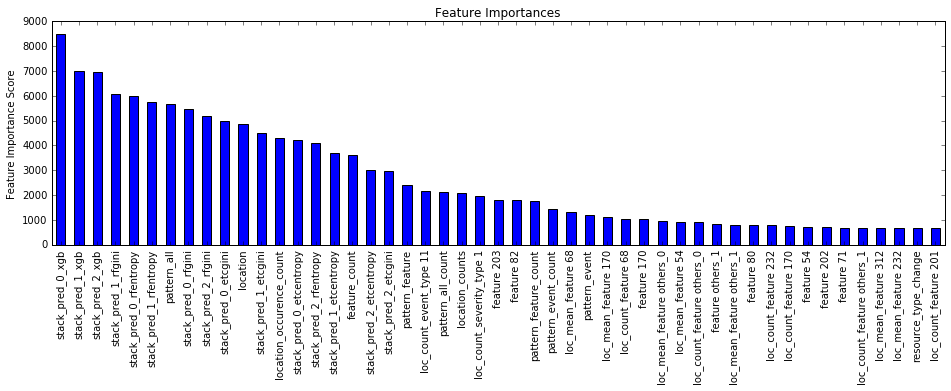


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4716    61    7
1.0              141  1728    2
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.101%
Train (log_loss) : 0.192205
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 4088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


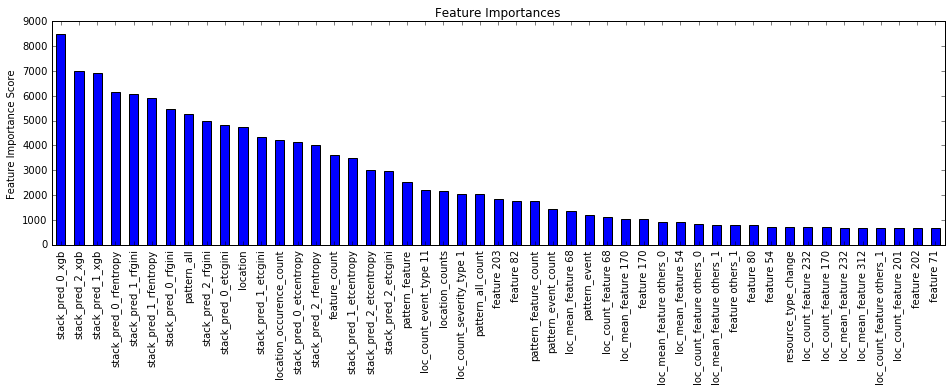


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4714    66    4
1.0              144  1726    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.046%
Train (log_loss) : 0.192923
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 5088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


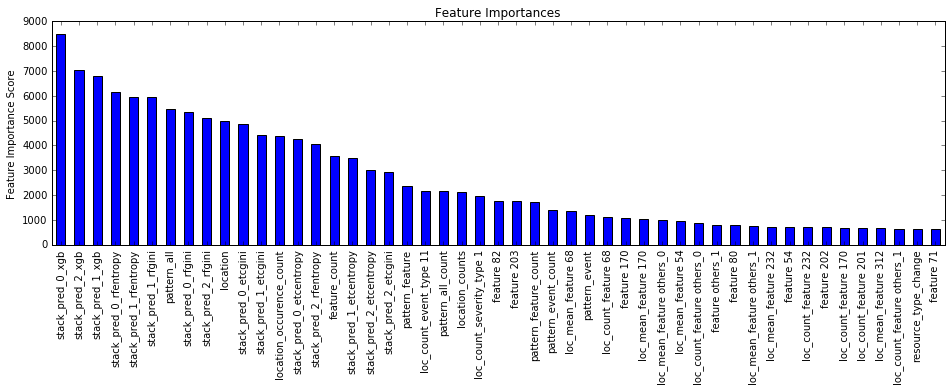


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4720    59    5
1.0              143  1726    2
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.128%
Train (log_loss) : 0.192530
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 6088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


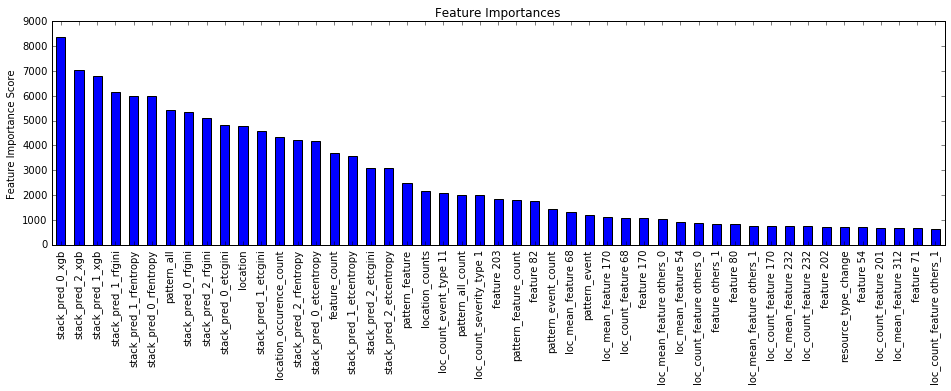


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    63    6
1.0              136  1734    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.168%
Train (log_loss) : 0.192301
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 7088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


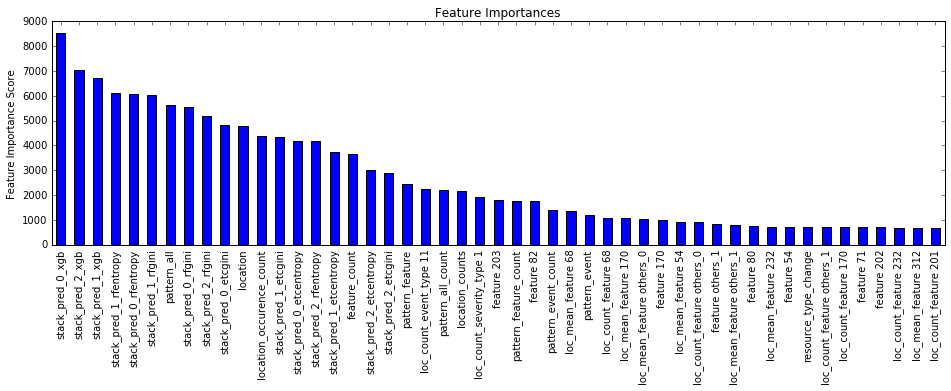


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4719    59    6
1.0              141  1729    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.155%
Train (log_loss) : 0.191928
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 8088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


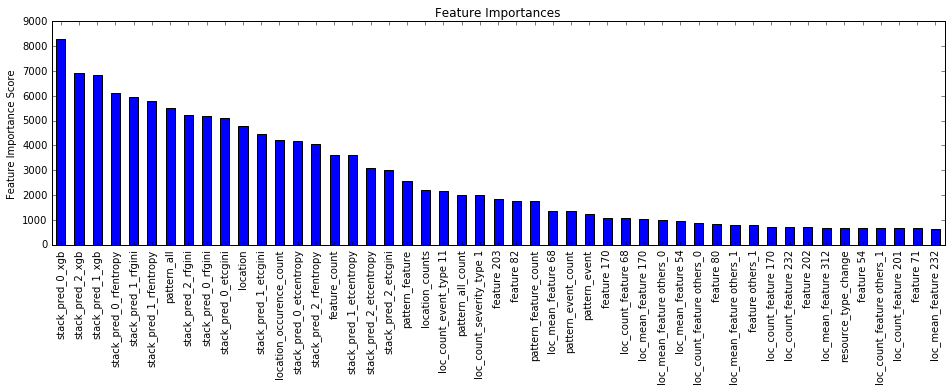


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4719    59    6
1.0              141  1728    2
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.141%
Train (log_loss) : 0.192928
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 0.1, 'seed': 9088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


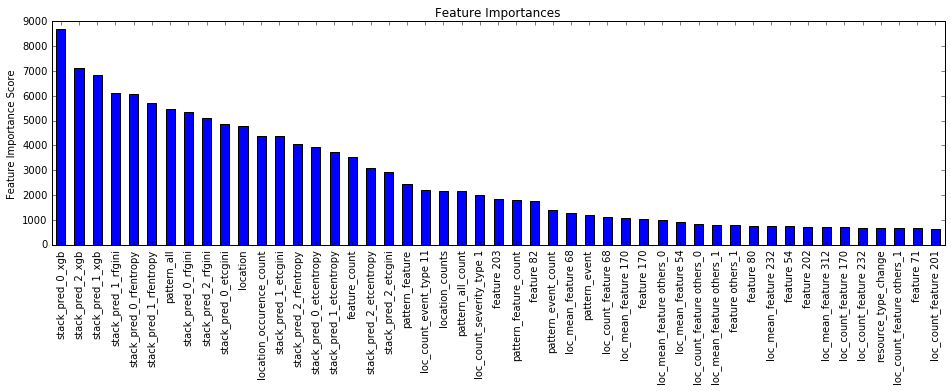


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4717    62    5
1.0              144  1727    0
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.101%
Train (log_loss) : 0.192640
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [200]:
for s in range(88 , 10000 , 1000):
    xgb18b = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb18b.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":0.1,
        "seed":s
    })
    xgb18b.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb18b_model2_seed%d.csv"%s
    xgb18b.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [201]:
model_comb = ["submission/xgb18b_model2_seed%d.csv"%s for s in range(88 , 10000 , 1000)]
combine_models_multi(model_comb , "submission/xgb18b_model2_seedcombo.csv")

True


{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 88, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


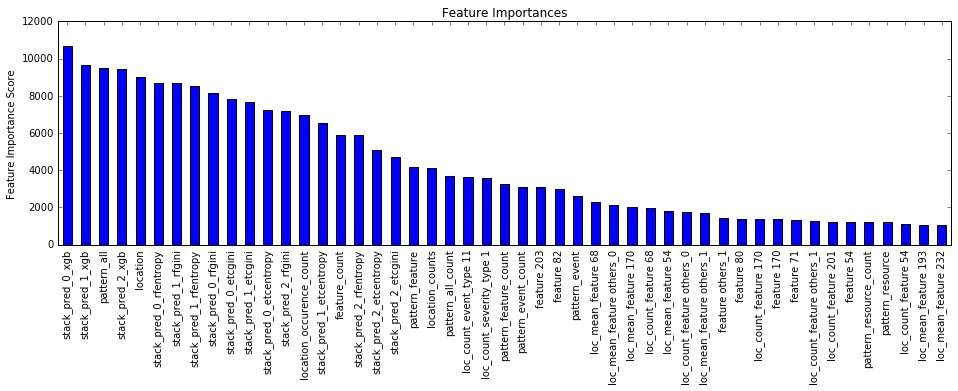


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4428   266   90
1.0              374  1422   75
2.0               54    50  622
Note: rows - actual; col - predicted
Train (Accuracy) : 87.685%
Train (log_loss) : 0.333943
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 1088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


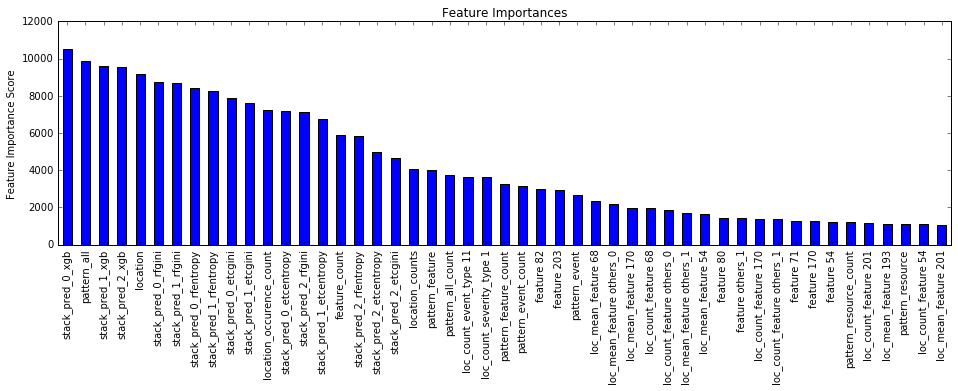


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4423   269   92
1.0              371  1425   75
2.0               54    48  624
Note: rows - actual; col - predicted
Train (Accuracy) : 87.685%
Train (log_loss) : 0.333613
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 2088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


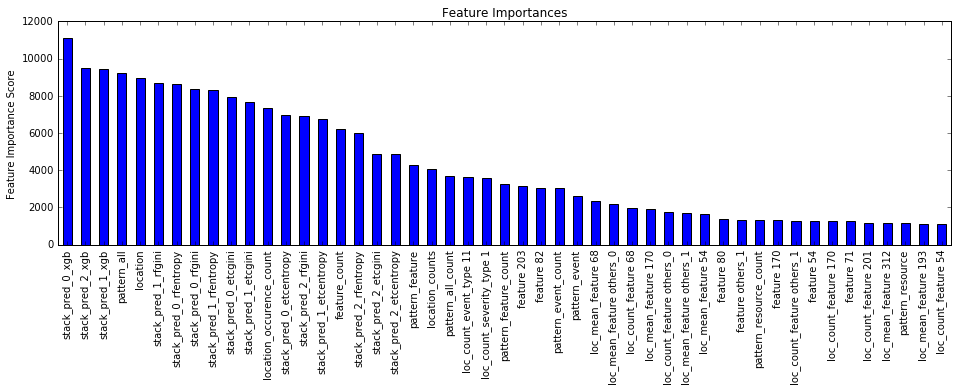


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4424   270   90
1.0              376  1421   74
2.0               55    48  623
Note: rows - actual; col - predicted
Train (Accuracy) : 87.630%
Train (log_loss) : 0.333899
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 3088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


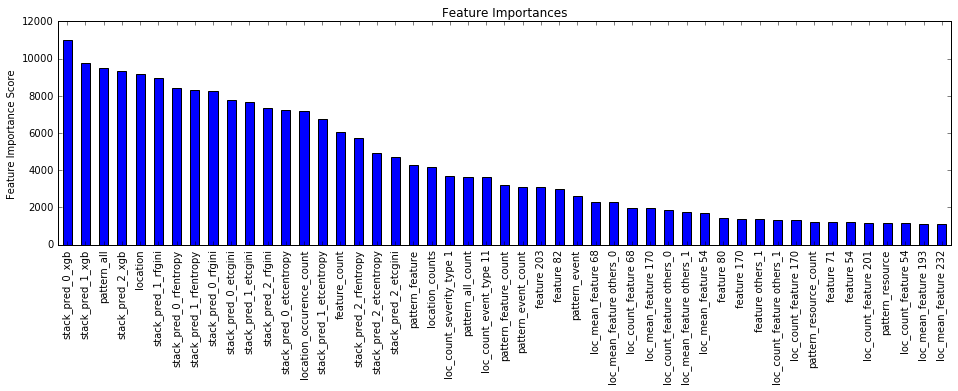


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4429   265   90
1.0              372  1425   74
2.0               52    49  625
Note: rows - actual; col - predicted
Train (Accuracy) : 87.779%
Train (log_loss) : 0.333865
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 4088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


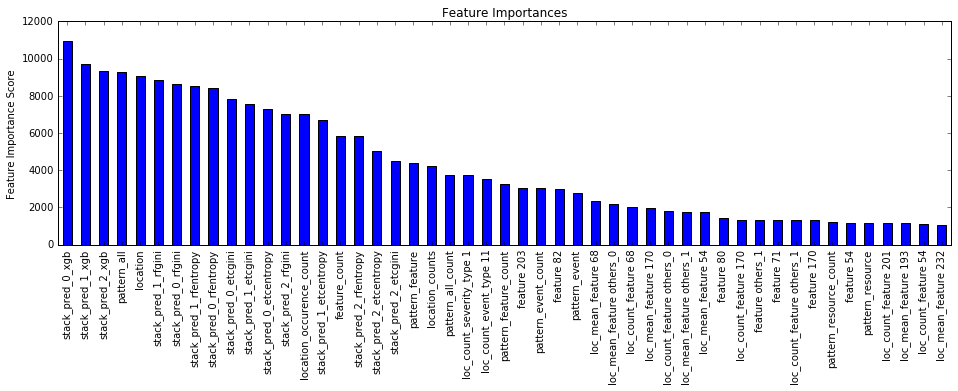


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4430   264   90
1.0              370  1424   77
2.0               53    48  625
Note: rows - actual; col - predicted
Train (Accuracy) : 87.779%
Train (log_loss) : 0.333681
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 5088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


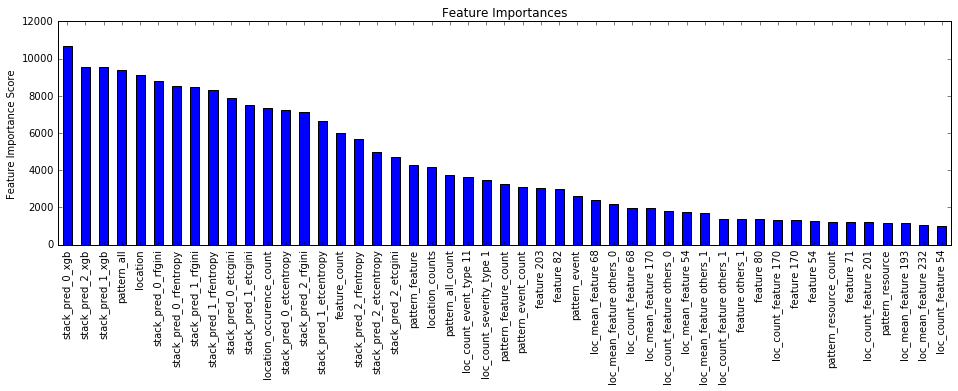


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4429   263   92
1.0              371  1426   74
2.0               55    47  624
Note: rows - actual; col - predicted
Train (Accuracy) : 87.779%
Train (log_loss) : 0.333907
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 6088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


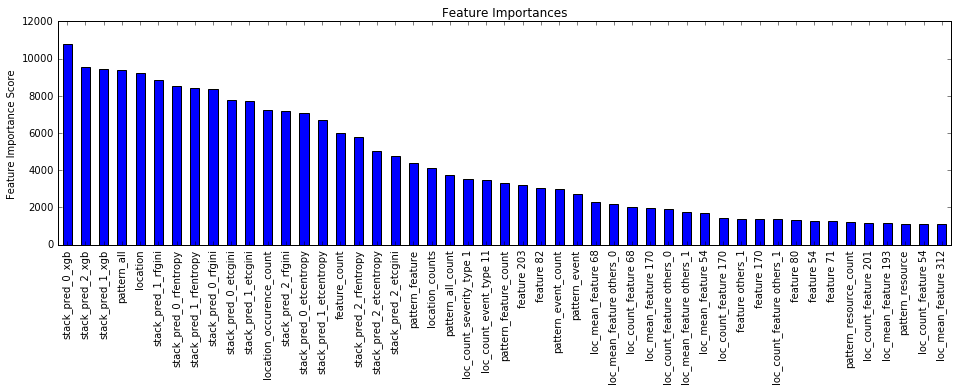


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4427   266   91
1.0              379  1418   74
2.0               56    47  623
Note: rows - actual; col - predicted
Train (Accuracy) : 87.630%
Train (log_loss) : 0.333561
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 7088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


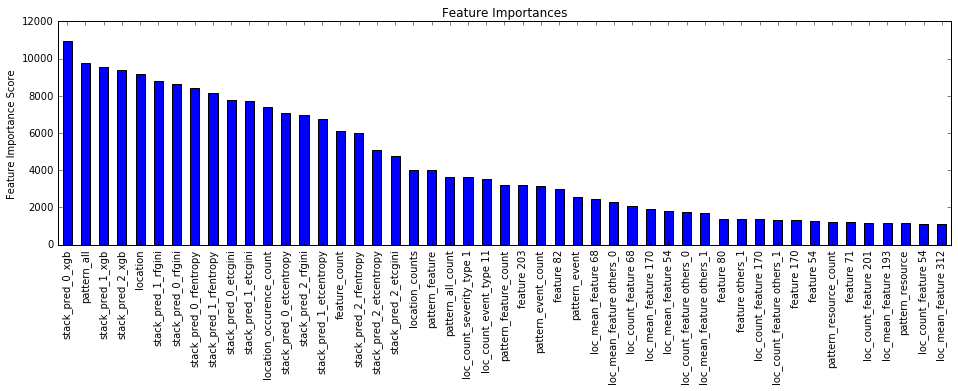


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4429   264   91
1.0              368  1428   75
2.0               53    47  626
Note: rows - actual; col - predicted
Train (Accuracy) : 87.834%
Train (log_loss) : 0.333765
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 8088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


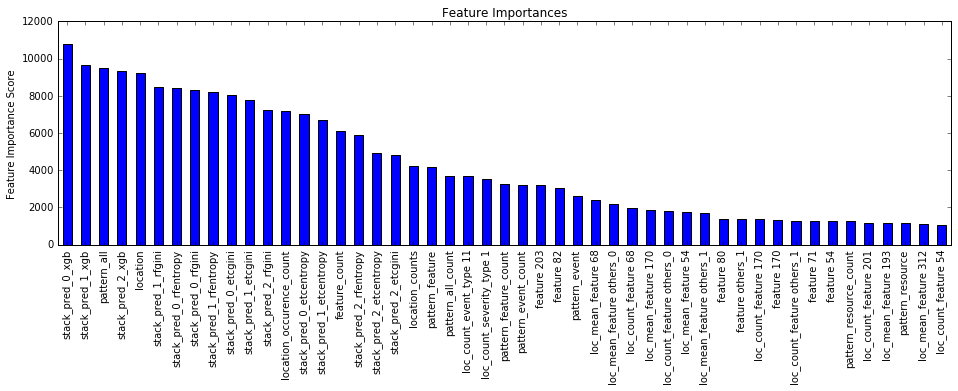


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4426   266   92
1.0              373  1426   72
2.0               56    49  621
Note: rows - actual; col - predicted
Train (Accuracy) : 87.698%
Train (log_loss) : 0.333503
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 100, 'seed': 9088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


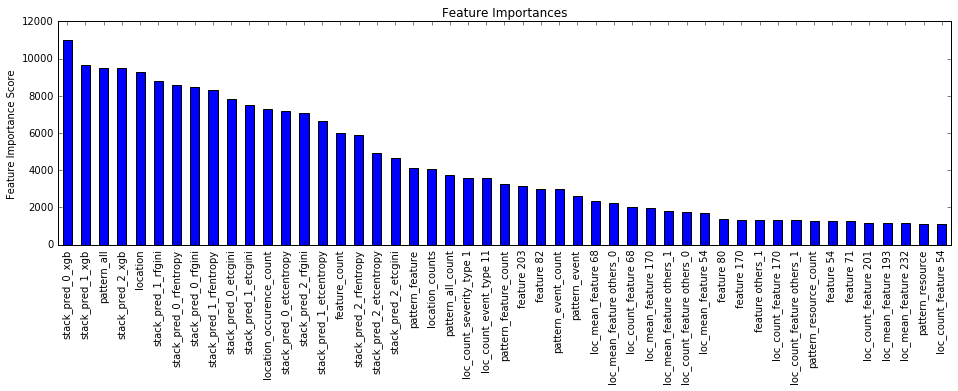


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4431   263   90
1.0              372  1425   74
2.0               53    48  625
Note: rows - actual; col - predicted
Train (Accuracy) : 87.807%
Train (log_loss) : 0.333713
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [202]:
for s in range(88 , 10000 , 1000):
    xgb18c = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb18c.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":100,
        "seed":s
    })
    xgb18c.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb18c_model2_seed%d.csv"%s
    xgb18c.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [203]:
model_comb = ["submission/xgb18c_model2_seed%d.csv"%s for s in range(88 , 10000 , 1000)]
combine_models_multi(model_comb , "submission/xgb18c_model2_seedcombo.csv")

True


{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 88, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


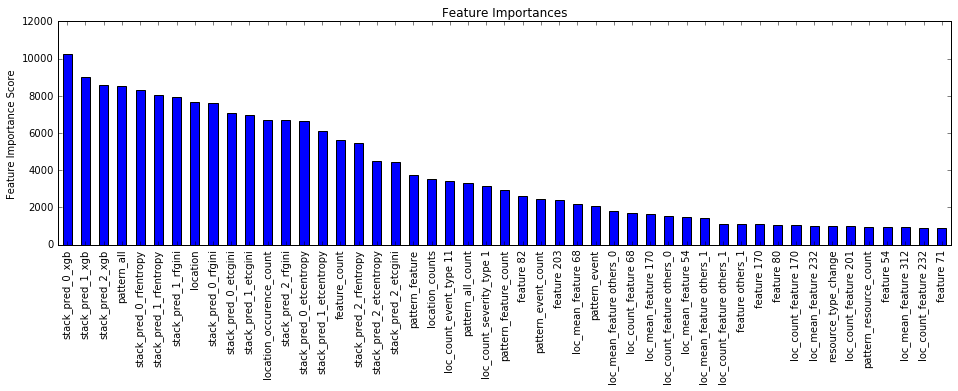


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4685    85   14
1.0              202  1653   16
2.0               18    10  698
Note: rows - actual; col - predicted
Train (Accuracy) : 95.326%
Train (log_loss) : 0.225735
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 1088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


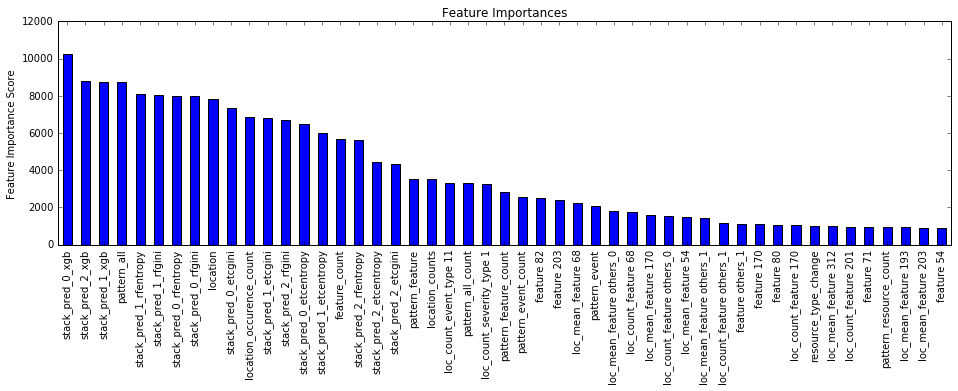


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4681    89   14
1.0              205  1651   15
2.0               19    11  696
Note: rows - actual; col - predicted
Train (Accuracy) : 95.217%
Train (log_loss) : 0.224848
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 2088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


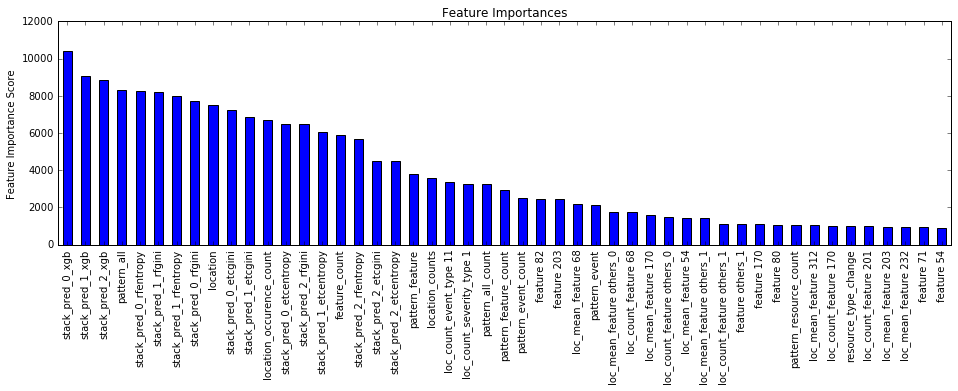


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4687    84   13
1.0              203  1651   17
2.0               17    11  698
Note: rows - actual; col - predicted
Train (Accuracy) : 95.326%
Train (log_loss) : 0.225233
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 3088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


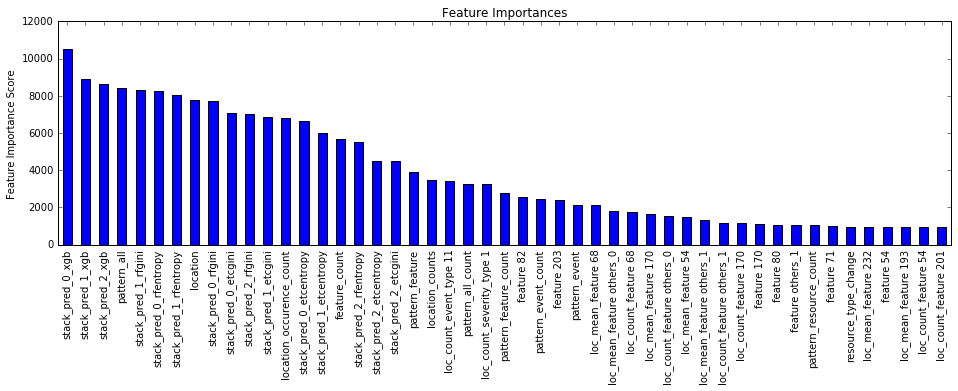


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4681    88   15
1.0              200  1653   18
2.0               20    12  694
Note: rows - actual; col - predicted
Train (Accuracy) : 95.217%
Train (log_loss) : 0.224574
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 4088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


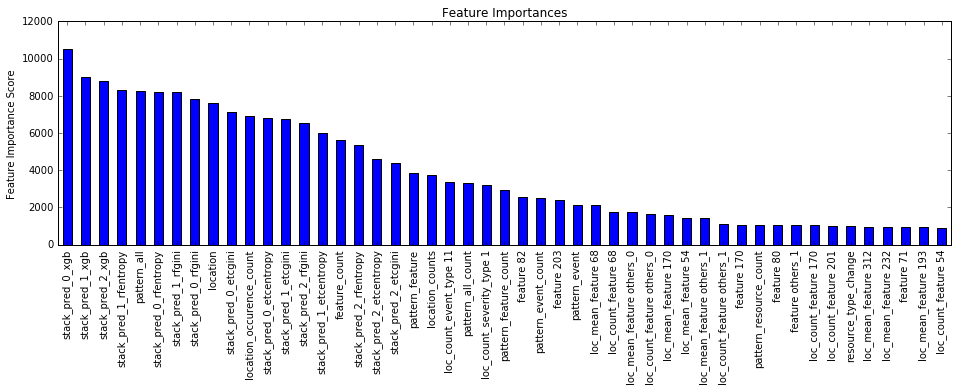


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4679    88   17
1.0              203  1651   17
2.0               17    10  699
Note: rows - actual; col - predicted
Train (Accuracy) : 95.231%
Train (log_loss) : 0.224524
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 5088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


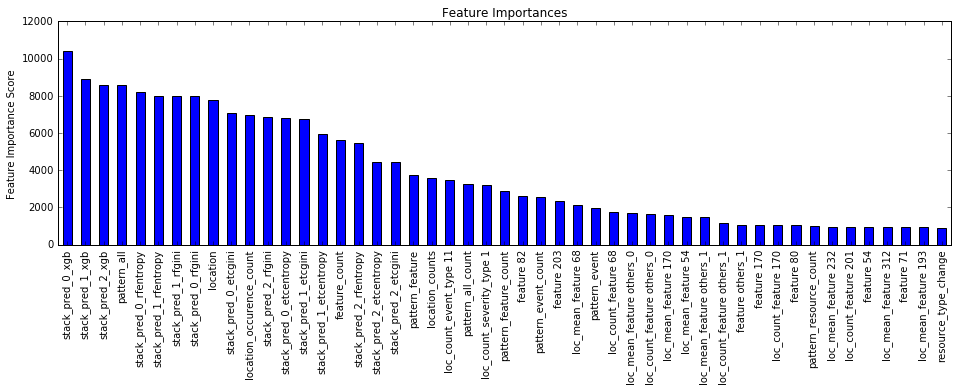


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4683    86   15
1.0              202  1650   19
2.0               16    12  698
Note: rows - actual; col - predicted
Train (Accuracy) : 95.258%
Train (log_loss) : 0.225024
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 6088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


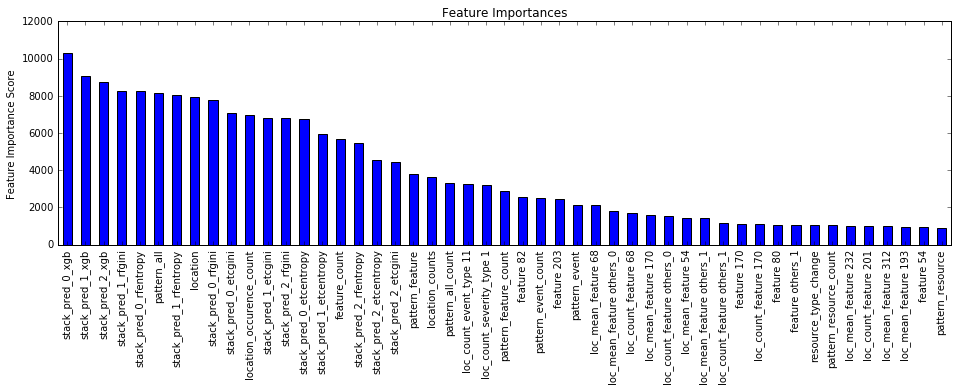


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4682    86   16
1.0              199  1653   19
2.0               17    12  697
Note: rows - actual; col - predicted
Train (Accuracy) : 95.272%
Train (log_loss) : 0.223419
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 7088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


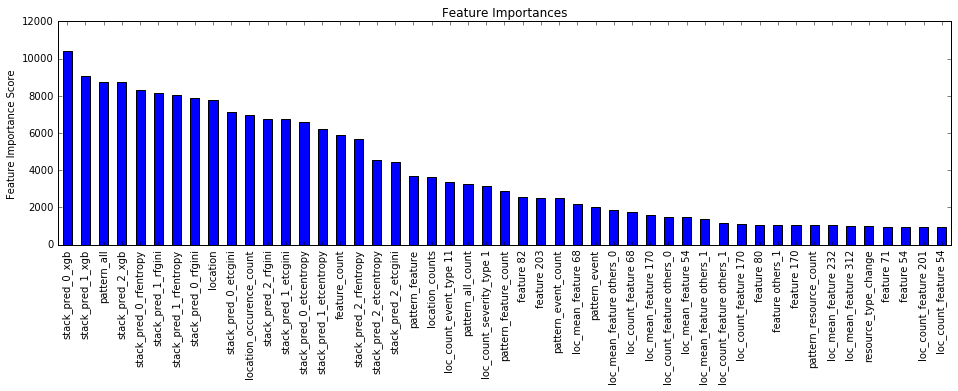


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4682    86   16
1.0              208  1648   15
2.0               16    10  700
Note: rows - actual; col - predicted
Train (Accuracy) : 95.245%
Train (log_loss) : 0.224197
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 8088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


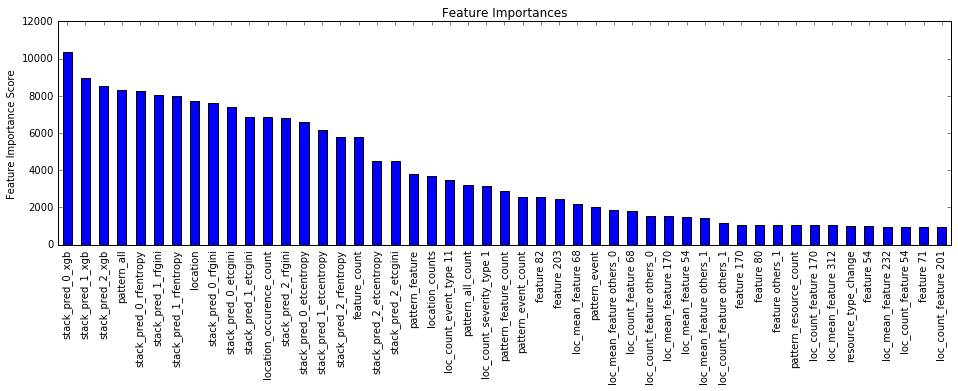


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4678    88   18
1.0              205  1649   17
2.0               18    11  697
Note: rows - actual; col - predicted
Train (Accuracy) : 95.163%
Train (log_loss) : 0.224808
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 10, 'seed': 9088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


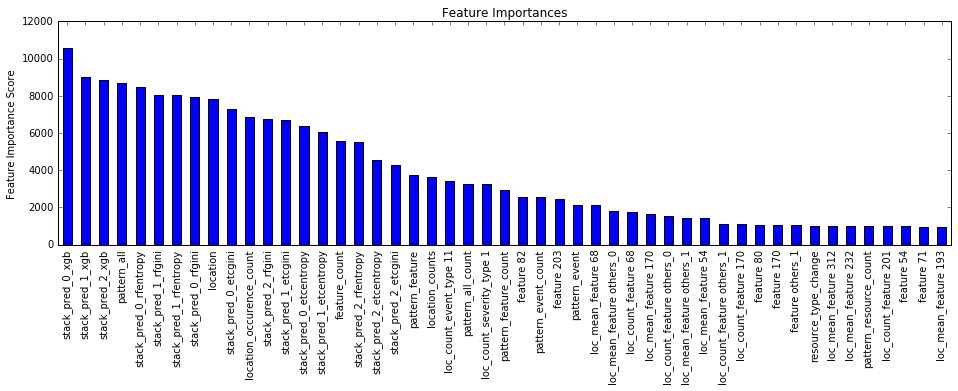


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4684    86   14
1.0              197  1659   15
2.0               17     9  700
Note: rows - actual; col - predicted
Train (Accuracy) : 95.421%
Train (log_loss) : 0.224185
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [204]:
for s in range(88 , 10000 , 1000):
    xgb18d = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb18d.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":10,
        "seed":s
    })
    xgb18d.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb18d_model2_seed%d.csv"%s
    xgb18d.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [205]:
model_comb = ["submission/xgb18d_model2_seed%d.csv"%s for s in range(88 , 10000 , 1000)]
combine_models_multi(model_comb , "submission/xgb18d_model2_seedcombo.csv")

True


{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 88, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


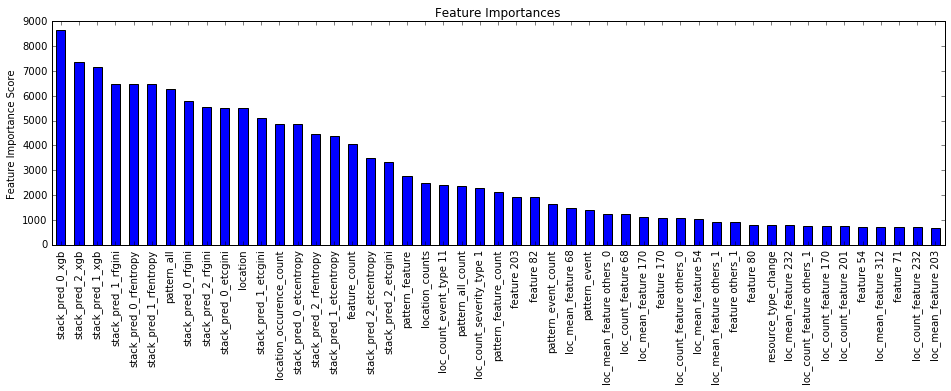


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4712    64    8
1.0              145  1725    1
2.0                5     1  720
Note: rows - actual; col - predicted
Train (Accuracy) : 96.965%
Train (log_loss) : 0.195006
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 1088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


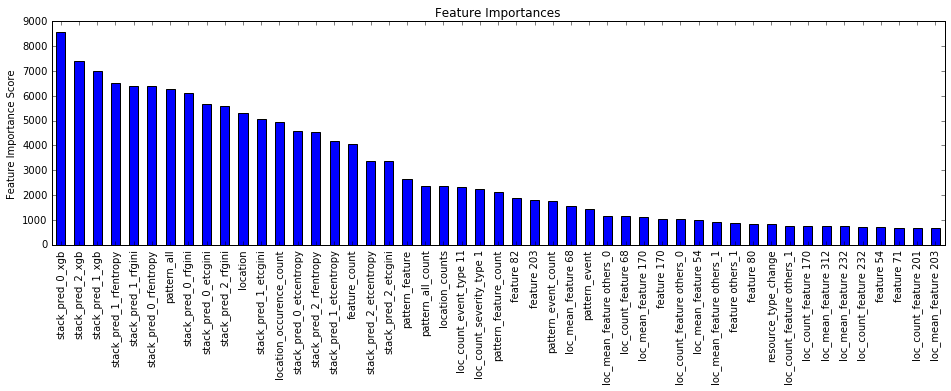


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4713    63    8
1.0              145  1724    2
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 96.979%
Train (log_loss) : 0.195889
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 2088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


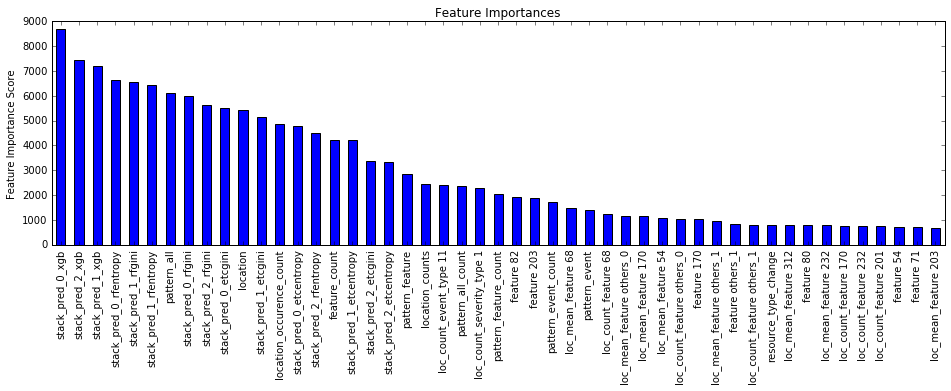


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4713    64    7
1.0              145  1724    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.992%
Train (log_loss) : 0.194552
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 3088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


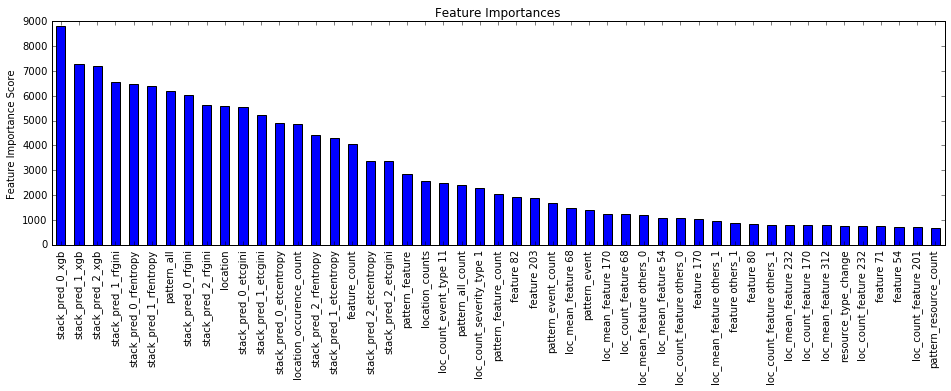


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4717    60    7
1.0              147  1723    1
2.0                2     1  723
Note: rows - actual; col - predicted
Train (Accuracy) : 97.046%
Train (log_loss) : 0.193532
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 4088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


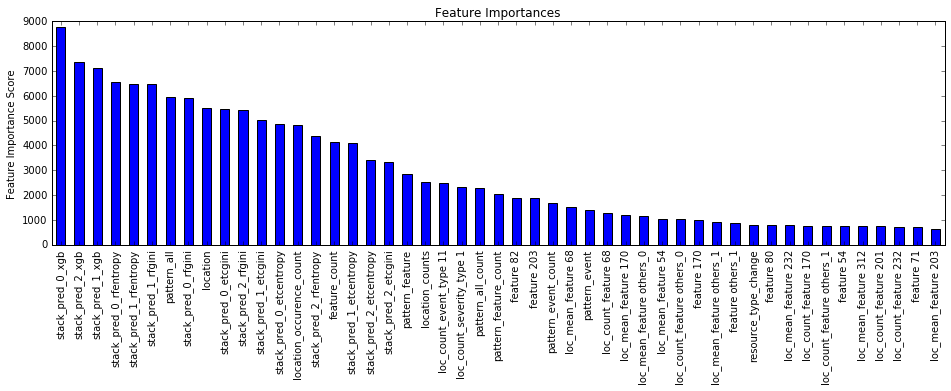


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    64    5
1.0              150  1720    1
2.0                5     1  720
Note: rows - actual; col - predicted
Train (Accuracy) : 96.938%
Train (log_loss) : 0.194894
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 5088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


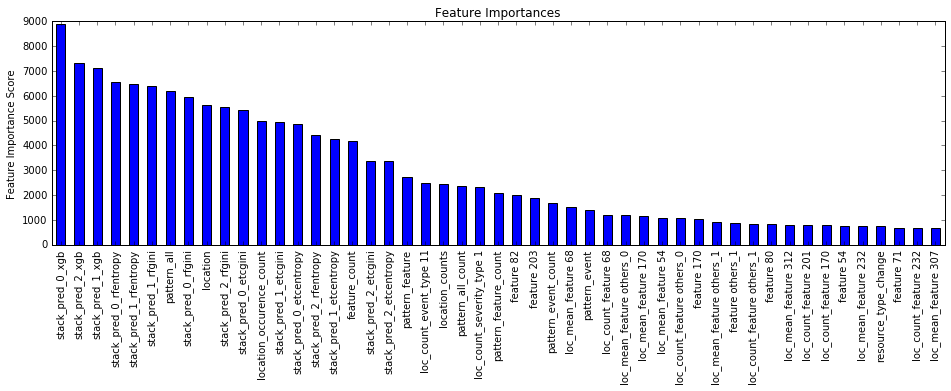


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    63    6
1.0              138  1731    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 97.114%
Train (log_loss) : 0.193743
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 6088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


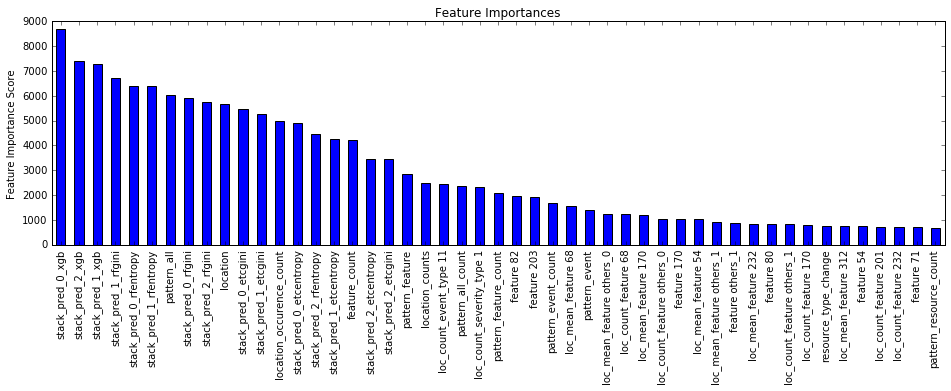


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4721    58    5
1.0              142  1727    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 97.141%
Train (log_loss) : 0.192665
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 7088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


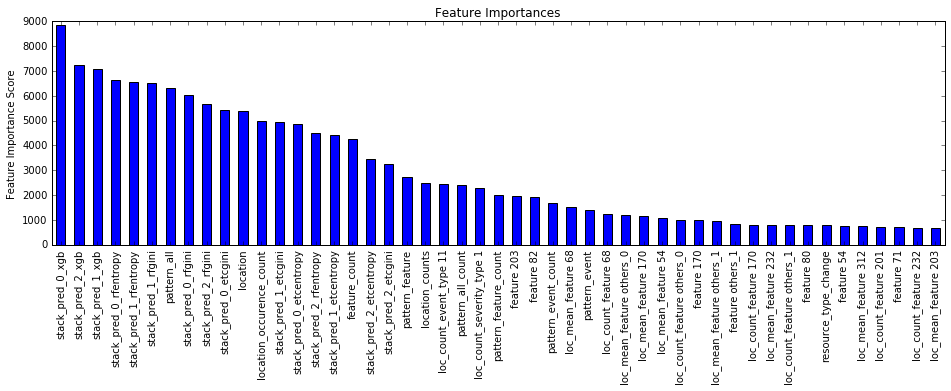


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4715    63    6
1.0              148  1721    2
2.0                3     1  722
Note: rows - actual; col - predicted
Train (Accuracy) : 96.979%
Train (log_loss) : 0.194385
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 8088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


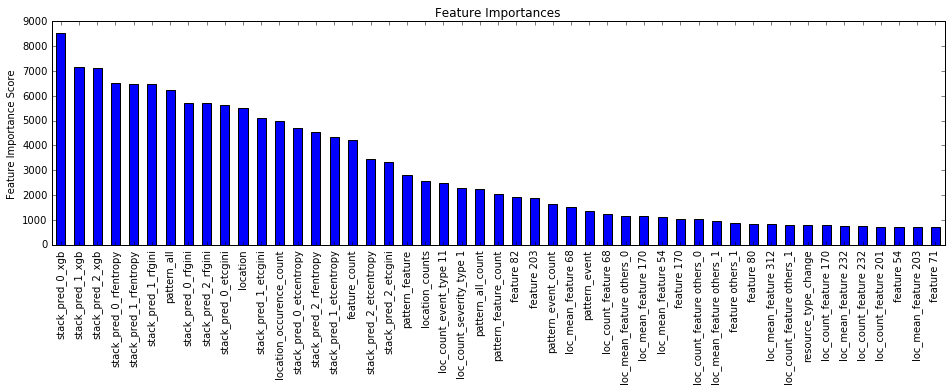


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4716    59    9
1.0              150  1719    2
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 96.952%
Train (log_loss) : 0.194386
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000
{'reg_alpha': 1e-05, 'colsample_bytree': 0.55, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 2000, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 9088, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


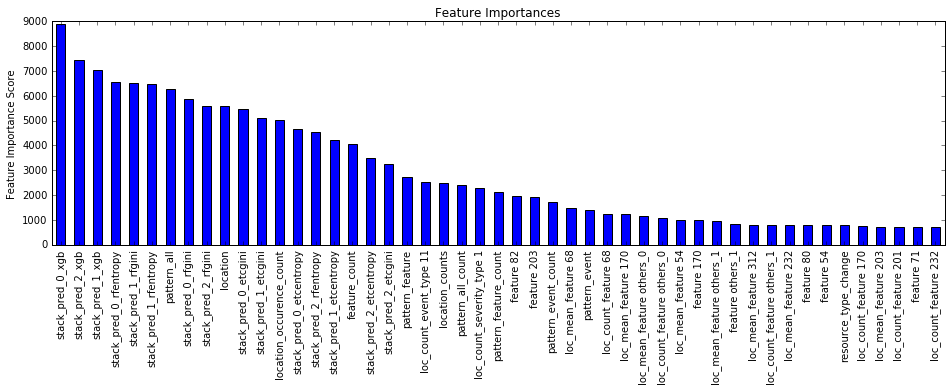


Model Report
Confusion Matrix:
col_0            0.0   1.0  2.0
fault_severity                 
0.0             4716    62    6
1.0              149  1719    3
2.0                4     1  721
Note: rows - actual; col - predicted
Train (Accuracy) : 96.952%
Train (log_loss) : 0.194531
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [206]:
for s in range(88 , 10000 , 1000):
    xgb18e = models_classification.XGBoost_Class(train2 , test2 , target , predictors , cv_folds=5 , 
                                               scoring_metric_skl = "log_loss" , scoring_metric_xgb = "mlogloss")
    xgb18e.set_parameters({
        "learning_rate":0.01 , 
        "n_estimators":2000 , 
        "max_depth":6 ,
        "min_child_weight":1 , 
        "gamma":0, 
        "subsample":0.8 , 
        "colsample_bytree":0.55 , 
        "objective":"multi:softprob" , 
        "num_class":3 , 
        "eval_metric":["mlogloss"] , 
        "missing":-1 , 
        "nthread":-1 , 
        "scale_pos_weight":1 ,
    "reg_alpha":1e-5 , 
    "reg_lambda":1,
        "seed":s
    })
    xgb18e.modelfit(useTrainCV = False , performCV = False , printTopN = 50)
    fn = "submission/xgb18e_model2_seed%d.csv"%s
    xgb18e.submission_proba(IDcol = [IDcol] , proba_colnames = output_colname , filename = fn)

In [207]:
xgb17d.export_model(IDcol=[IDcol])

## export train2 and test2

In [208]:
train2.to_csv("data/train_modified_5.csv" , index=False)
test2.to_csv("data/test_modified_5.csv" , index = False)